In [ ]:
pip uninstall googletrans googletrans-temp

In [ ]:
pip install googletrans

In [ ]:
pip install git+https://github.com/BoseCorp/py-googletrans.git --upgrade

  Cloning https://github.com/BoseCorp/py-googletrans.git to /tmp/pip-req-build-a8zy4xd4
  Running command git clone -q https://github.com/BoseCorp/py-googletrans.git /tmp/pip-req-build-a8zy4xd4
  Created wheel for googletrans: filename=googletrans-2.3.0-cp36-none-any.whl size=16447 sha256=1233050226590fe3bce1c9e633b1aa20bde3db9fa61f90efcadd0e81cdccc275
  Stored in directory: /tmp/pip-ephem-wheel-cache-_1qz_rpq/wheels/6a/fc/9e/2d31d95d9e97da5166afd8225a6f3b6850dc2c6e84accefbfc
Successfully built googletrans


In [ ]:
pip install Sastrawi

In [1]:
import pandas as pd
import numpy as np
import math
import random
import re
import string  

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_extraction.text import CountVectorizer

# **Data Analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Dataset

In [ ]:
df = pd.read_csv("drive/My Drive/TA2/before_preprocessing.csv")
df_trans_id = pd.read_csv("drive/My Drive/TA2/before_preprocessing_id.csv", encoding= 'unicode_escape')
df_trans_en_id = pd.read_csv("drive/My Drive/TA2/before_preprocessing_en_id.csv", encoding= 'unicode_escape')

In [ ]:
df.head()

,review_id,review_text,price,packaging,product,aroma
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1,0,1,0
1,838,"ini enak banget dipakainya, enteng banget diwa...",0,0,1,0
2,1166,the description is quite right. produk ini ema...,0,0,1,1
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1,1,1,0
4,1421,saya beli produk ini karena suka banget wangin...,-1,0,0,1


In [ ]:
df_trans_id.head()

,review_id,review_text,price,packaging,product,aroma
0,708.0,tabir surya termahal yang pernah gue beli ini ...,-1,0,1,0
1,838.0,"ini enak banget dipakainya, enteng banget diwa...",0,0,1,0
2,1166.0,uraiannya cukup tepat. produk ini emang cocok ...,0,0,1,1
3,1374.0,bisa untuk wajah dan badan dengan harga yang s...,1,1,1,0
4,1421.0,saya beli produk ini karena suka banget wangin...,-1,0,0,1


In [ ]:
df_trans_en_id.head()

,review_id,review_text,price,packaging,product,aroma
0,708,Tabir surya termahal yang pernah saya beli itu...,-1,0,1,0
1,838,"ini sangat bagus untuk dipakai, sangat ringan ...",0,0,1,0
2,1166,uraiannya cukup tepat. produk ini sangat cocok...,0,0,1,1
3,1374,bisa digunakan untuk wajah dan badan dengan ha...,1,1,1,0
4,1421,Saya membeli produk ini karena saya sangat suk...,-1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    5054 non-null   int64 
 1   review_text  5054 non-null   object
 2   price        5054 non-null   int64 
 3   packaging    5054 non-null   int64 
 4   product      5054 non-null   int64 
 5   aroma        5054 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 237.0+ KB


In [ ]:
df_trans_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    5054 non-null   float64
 1   review_text  5054 non-null   object 
 2   price        5054 non-null   int64  
 3   packaging    5054 non-null   int64  
 4   product      5054 non-null   int64  
 5   aroma        5054 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 237.0+ KB


In [ ]:
df_trans_en_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    5054 non-null   object
 1   review_text  5054 non-null   object
 2   price        5054 non-null   int64 
 3   packaging    5054 non-null   int64 
 4   product      5054 non-null   int64 
 5   aroma        5054 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 237.0+ KB


In [ ]:
df.dropna(inplace=True)
df_trans_id.dropna(inplace=True)
df_trans_en_id.dropna(inplace=True)

## Data Distribution

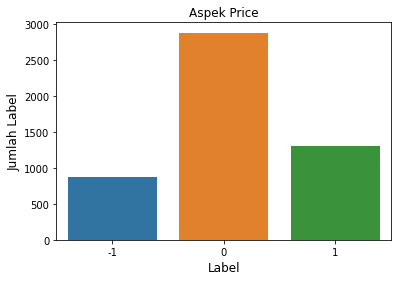

In [ ]:
sns.countplot(x='price', data=df)
    
plt.title('Aspek Price')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

In [ ]:
#Hitung jumlah label 
price = df.groupby(['price'])['price'].count()
price

price
-1     868
 0    2880
 1    1306
Name: price, dtype: int64

Text(0.5, 0, 'Label')

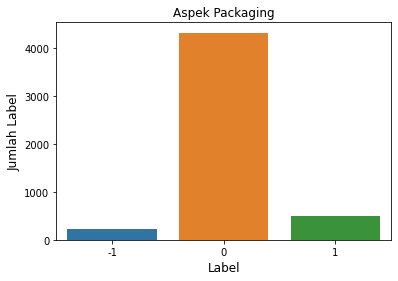

In [ ]:
sns.countplot(x='packaging', data=df)
plt.title('Aspek Packaging')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [ ]:
#Hitung jumlah label 
packaging = df.groupby(['packaging'])['packaging'].count()
packaging

packaging
-1     226
 0    4322
 1     506
Name: packaging, dtype: int64

Text(0.5, 0, 'Label')

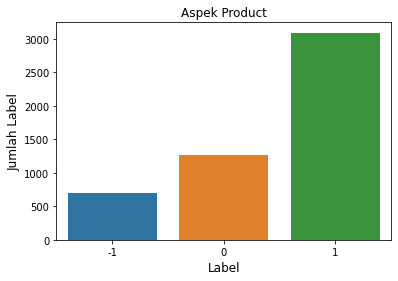

In [ ]:
sns.countplot(x='product', data=df)
plt.title('Aspek Product')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [ ]:
#Hitung label 
product = df.groupby(['product'])['product'].count()
product

product
-1     698
 0    1264
 1    3092
Name: product, dtype: int64

Text(0.5, 0, 'Label')

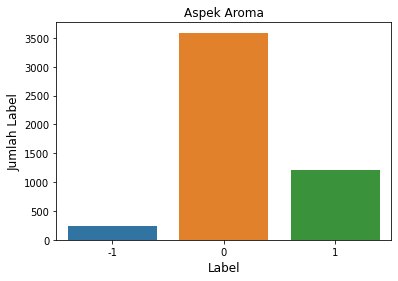

In [ ]:
sns.countplot(x='aroma', data=df)
plt.title('Aspek Aroma')
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)

In [ ]:
#Hitung label 
aroma = df.groupby(['aroma'])['aroma'].count()
aroma

aroma
-1     247
 0    3589
 1    1218
Name: aroma, dtype: int64

## Common Words

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print(sum_words.sum(axis=1))
    print(len(words_freq))
    print(words_freq[:n])
    return words_freq[:n]

[[180650]]
8864
[('tidak', 6183), ('pakai', 6041), ('kulit', 4256), ('buat', 3355), ('jadi', 3298), ('banget', 2955), ('kalau', 1933), ('lebih', 1922), ('produk', 1865), ('muka', 1761), ('rasa', 1738), ('suka', 1625), ('wajah', 1605), ('sama', 1518), ('harga', 1515), ('jerawat', 1304), ('toner', 1300), ('wangi', 1155), ('beli', 1137), ('coba', 1127)]


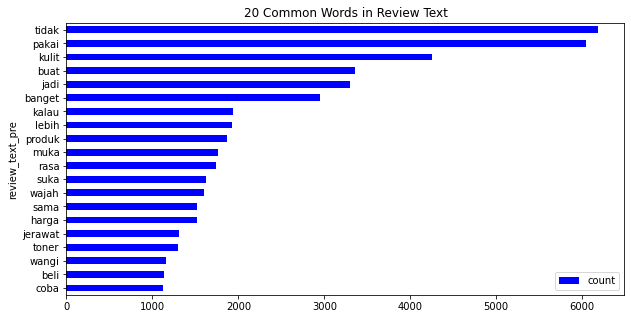

In [ ]:
common_words_ = get_top_n_words(data_train_full['review_text_pre'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text_pre' , 'count'])
fig, ax = plt.subplots(figsize=(10, 5))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text_pre', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

[[247390]]
8994
[('ini', 6836), ('saya', 6564), ('dan', 6489), ('tidak', 6189), ('pakai', 6041), ('kulit', 4256), ('yang', 3873), ('di', 3599), ('buat', 3355), ('jadi', 3298), ('banget', 2955), ('tapi', 2813), ('karena', 2487), ('juga', 2292), ('kalau', 1933), ('lebih', 1922), ('untuk', 1913), ('produk', 1865), ('muka', 1761), ('rasa', 1738)]


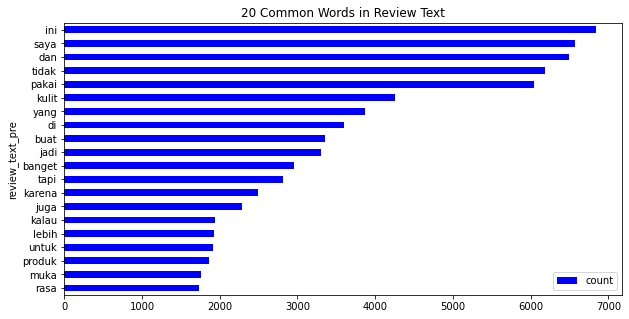

In [ ]:
common_words_ = get_top_n_words(data_train_nostop['review_text_pre'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text_pre' , 'count'])
fig, ax = plt.subplots(figsize=(10, 5))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text_pre', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

[[246134]]
8133
[('saya', 7315), ('ini', 7240), ('dan', 6842), ('tidak', 6460), ('pakai', 5939), ('kulit', 4615), ('yang', 4428), ('di', 3662), ('jadi', 3417), ('buat', 3318), ('banget', 2965), ('tapi', 2925), ('karena', 2532), ('juga', 2301), ('produk', 2155), ('untuk', 2151), ('lebih', 2052), ('kalau', 1921), ('suka', 1883), ('muka', 1761)]


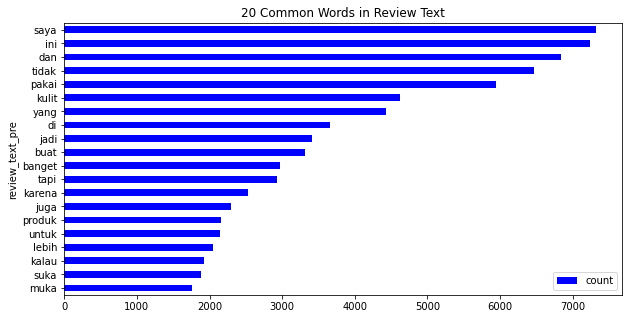

In [ ]:
common_words_ = get_top_n_words(data_train_trans_id_nostop['review_text_pre'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text_pre' , 'count'])
fig, ax = plt.subplots(figsize=(10, 5))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text_pre', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

[[241117]]
[('saya', 12345), ('dan', 7090), ('ini', 6718), ('tidak', 6376), ('yang', 4757), ('kulit', 4625), ('guna', 4125), ('untuk', 3353), ('wajah', 3145), ('di', 3126), ('karena', 2770), ('tapi', 2709), ('sangat', 2585), ('pakai', 2429), ('jadi', 2373), ('dengan', 2321), ('lebih', 2291), ('buat', 2240), ('produk', 2210), ('telah', 2000)]


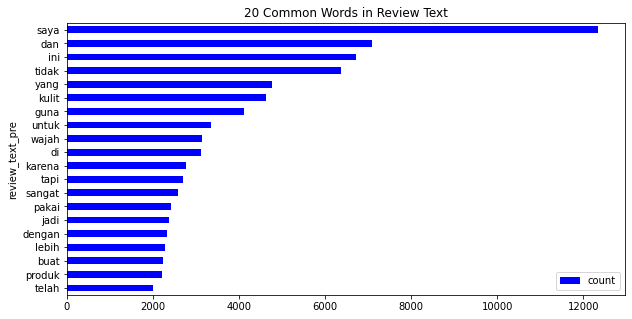

In [ ]:
common_words_ = get_top_n_words(data_train_trans_en_id_nostop['review_text_pre'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text_pre' , 'count'])
fig, ax = plt.subplots(figsize=(10, 5))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text_pre', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

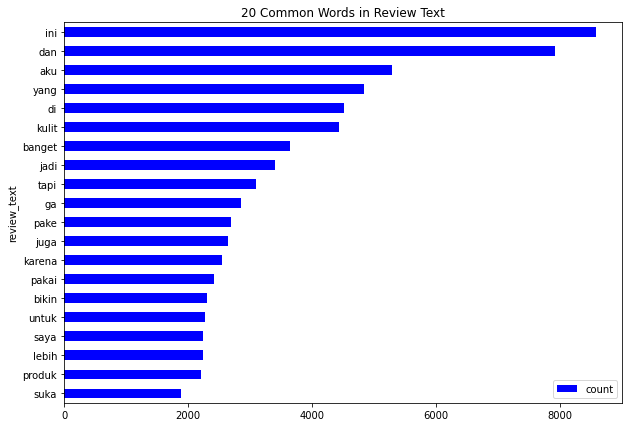

In [ ]:
common_words_ = get_top_n_words(df['review_text'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text' , 'count'])
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

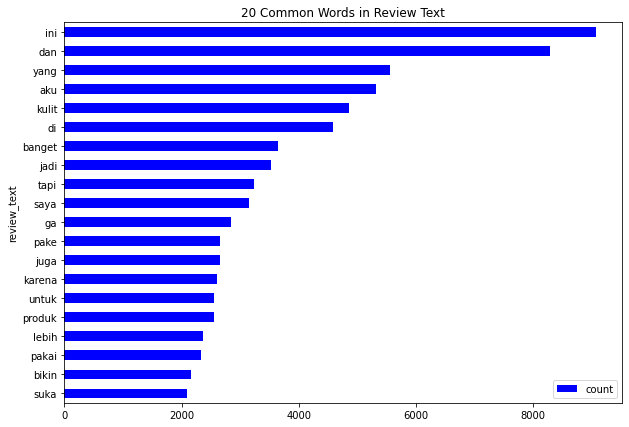

In [ ]:
common_words_ = get_top_n_words(df_trans_id['review_text'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text' , 'count'])
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

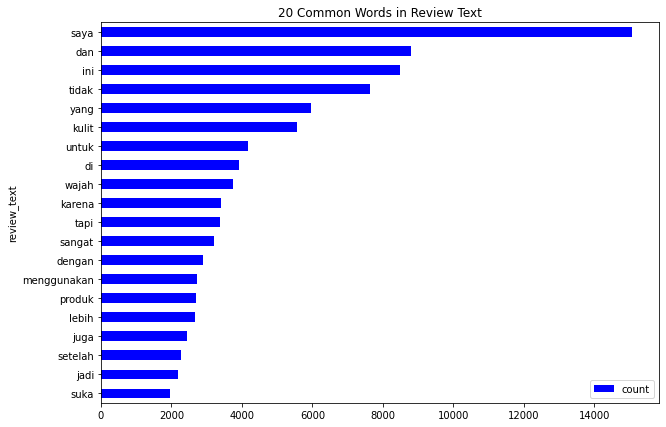

In [ ]:
common_words_ = get_top_n_words(df_trans_en_id['review_text'], 20)
top_word = pd.DataFrame(common_words_, columns = ['review_text' , 'count'])
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
top_word.sort_values(by='count').plot(kind ='barh', x ='review_text', y ='count', ax = ax, color="blue")
ax.set_title("20 Common Words in Review Text")
plt.show()

## Split Data Train (80%) & Data Test (20%)

In [ ]:
from sklearn.model_selection import train_test_split

def splitTrainTest(df):
    X_train, X_test, y_train, y_test = train_test_split(df['review_text'], df[['price','packaging','product','aroma']], test_size = 0.2, random_state = 9)

    data_train = y_train.copy() 
    data_train = data_train.join(X_train)

    data_test = y_test.copy() 
    data_test = data_test.join(X_test)

    return data_train, data_test

In [ ]:
data_train, data_test = splitTrainTest(df)
data_train_trans_id, data_test_trans_id = splitTrainTest(df_trans_id)
data_train_trans_en_id, data_test_trans_en_id = splitTrainTest(df_trans_en_id)

In [ ]:
data_train.head()

,price,packaging,product,aroma,review_text
74,0,0,1,1,love it so much! awalnha aku bukan orang yg su...
106,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ..."
2302,0,-1,-1,0,"pacakginya gedee banget,,,ga travel friendly s..."
1760,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...
2266,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...


In [ ]:
data_train_trans_id.head()

,price,packaging,product,aroma,review_text
74,0,0,1,1,sangat menyukainya! awalnha aku bukan orang yg...
106,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ..."
2302,0,-1,-1,0,"pacakginya gedee banget ,,, ga travel friendly..."
1760,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...
2266,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...


In [ ]:
data_train_trans_en_id.head()

,price,packaging,product,aroma,review_text
74,0,0,1,1,sangat menyukainya! Awalnya saya bukanlah oran...
106,0,1,1,0,"Pada kulit kombinasi saya, tabir surya ini san..."
2302,0,-1,-1,0,"pacakgnya benar-benar gedee ,,, tidak ramah pe..."
1760,0,0,1,0,"Pori ajaib ini benar-benar mempengaruhi saya, ..."
2266,-1,0,-1,0,kalau saya bilang mahal karena tidak cocok den...


In [ ]:
print('Jumlah Data Train :', len(data_train))
print('Price : ', data_train.groupby(['price'])['price'].count())
print('Packaging : ', data_train.groupby(['packaging'])['packaging'].count())
print('Product : ', data_train.groupby(['product'])['product'].count())
print('Aroma : ', data_train.groupby(['aroma'])['aroma'].count())

Jumlah Data Train : 4043
Price :  price
-1     691
 0    2300
 1    1052
Name: price, dtype: int64
Packaging :  packaging
-1     174
 0    3462
 1     407
Name: packaging, dtype: int64
Product :  product
-1     569
 0    1019
 1    2455
Name: product, dtype: int64
Aroma :  aroma
-1     205
 0    2860
 1     978
Name: aroma, dtype: int64


In [ ]:
data_test.head()

,price,packaging,product,aroma,review_text
1144,1,0,1,1,dari semua smlc yang saya punya warna ini yang...
2704,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...
4761,0,0,0,1,warnanya menarik dan rasanya enak. edible but ...
1494,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura..."
995,1,0,1,0,my first colourpop lipstick :) dan puas banget...


In [ ]:
data_test_trans_id.head()

,price,packaging,product,aroma,review_text
1144,1,0,1,1,dari semua smlc yang saya punya warna ini yang...
2704,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...
4761,0,0,0,1,warnanya menarik dan rasanya enak. bisa dimaka...
1494,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura..."
995,1,0,1,0,my first colourpop lipstick :) dan puas banget...


In [ ]:
data_test_trans_en_id.head()

,price,packaging,product,aroma,review_text
1144,1,0,1,1,dari semua smlc ini saya punya warna yang pali...
2704,0,0,1,0,Brand ini sudah lama saya kenal karena saya sa...
4761,0,0,0,1,warna yang menarik dan rasa yang enak. bisa di...
1494,1,-1,1,0,"murah, dan bagus. suka kalau ada yang murah ta..."
995,1,0,1,0,lipstik colourpop pertama saya :) dan saya san...


In [ ]:
print('Jumlah Data Test :', len(data_test))
print('Price : ', data_test.groupby(['price'])['price'].count())
print('Packaging : ', data_test.groupby(['packaging'])['packaging'].count())
print('Product : ', data_test.groupby(['product'])['product'].count())
print('Aroma : ', data_test.groupby(['aroma'])['aroma'].count())

Jumlah Data Test : 1011
Price :  price
-1    177
 0    580
 1    254
Name: price, dtype: int64
Packaging :  packaging
-1     52
 0    860
 1     99
Name: packaging, dtype: int64
Product :  product
-1    129
 0    245
 1    637
Name: product, dtype: int64
Aroma :  aroma
-1     42
 0    729
 1    240
Name: aroma, dtype: int64


In [ ]:
#Save Data Train & Data Test

data_train.to_csv("drive/My Drive/TA2/data_train.csv")
data_test.to_csv("drive/My Drive/TA2/data_test.csv")

data_train_trans_id.to_csv("drive/My Drive/TA2/data_train_trans_id.csv")
data_test_trans_id.to_csv("drive/My Drive/TA2/data_test_trans_id.csv")

data_train_trans_en_id.to_csv("drive/My Drive/TA2/data_train_trans_en_id.csv")
data_test_trans_en_id.to_csv("drive/My Drive/TA2/data_test_trans_en_id.csv")

# **PreProcessing**

## Read Data Train & Data Test

In [ ]:
# Read Data Train & Data Test

data_train = pd.read_csv("drive/My Drive/TA2/data_train.csv")
data_train = data_train.drop(columns=['Unnamed: 0'])
data_test = pd.read_csv("drive/My Drive/TA2/data_test.csv")
data_test = data_test.drop(columns=['Unnamed: 0'])

data_train_trans_id = pd.read_csv("drive/My Drive/TA2/data_train_trans_id.csv")
data_train_trans_id = data_train_trans_id.drop(columns=['Unnamed: 0'])
data_test_trans_id = pd.read_csv("drive/My Drive/TA2/data_test_trans_id.csv")
data_test_trans_id = data_test_trans_id.drop(columns=['Unnamed: 0'])

data_train_trans_en_id = pd.read_csv("drive/My Drive/TA2/data_train_trans_en_id.csv")
data_train_trans_en_id = data_train_trans_en_id.drop(columns=['Unnamed: 0'])
data_test_trans_en_id = pd.read_csv("drive/My Drive/TA2/data_test_trans_en_id.csv")
data_test_trans_en_id = data_test_trans_en_id.drop(columns=['Unnamed: 0'])

In [ ]:
data_train.head()

,price,packaging,product,aroma,review_text
0,0,0,1,1,love it so much! awalnha aku bukan orang yg su...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ..."
2,0,-1,-1,0,"pacakginya gedee banget,,,ga travel friendly s..."
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...


In [ ]:
data_train_trans_id.head()

,price,packaging,product,aroma,review_text
0,0,0,1,1,sangat menyukainya! awalnha aku bukan orang yg...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ..."
2,0,-1,-1,0,"pacakginya gedee banget ,,, ga travel friendly..."
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...


In [ ]:
data_train_trans_en_id.head()

,price,packaging,product,aroma,review_text
0,0,0,1,1,sangat menyukainya! Awalnya saya bukanlah oran...
1,0,1,1,0,"Pada kulit kombinasi saya, tabir surya ini san..."
2,0,-1,-1,0,"pacakgnya benar-benar gedee ,,, tidak ramah pe..."
3,0,0,1,0,"Pori ajaib ini benar-benar mempengaruhi saya, ..."
4,-1,0,-1,0,kalau saya bilang mahal karena tidak cocok den...


In [ ]:
data_test.head()

,price,packaging,product,aroma,review_text
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...
2,0,0,0,1,warnanya menarik dan rasanya enak. edible but ...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura..."
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...


In [ ]:
data_test_trans_id.head()

,price,packaging,product,aroma,review_text
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...
2,0,0,0,1,warnanya menarik dan rasanya enak. bisa dimaka...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura..."
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...


In [ ]:
data_test_trans_en_id.head()

,price,packaging,product,aroma,review_text
0,1,0,1,1,dari semua smlc ini saya punya warna yang pali...
1,0,0,1,0,Brand ini sudah lama saya kenal karena saya sa...
2,0,0,0,1,warna yang menarik dan rasa yang enak. bisa di...
3,1,-1,1,0,"murah, dan bagus. suka kalau ada yang murah ta..."
4,1,0,1,0,lipstik colourpop pertama saya :) dan saya san...


## Punctuation Removal

Pengilangan simbol khusus seperti \r, \n, ", url, dan byte code

In [ ]:
def cleaning(df):    
    df = re.sub(r"\n", " ",df)
    df = re.sub(r"\r", " ",df)
    df = re.sub(r"&amp;", " ",df)
    df = re.sub(r"&gt;", " ",df)
    df = re.sub(r"&lt;", " ",df)
    df = re.sub(r"&quot;", " ",df)
    df = re.sub(r"\u00a0", " ",df) 
    df = re.sub(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "",df)
    df = re.sub(r"'s","",df)
    df = re.sub(r"can't","can not",df)
    df = re.sub(r"ain't","am not",df)
    df = re.sub(r"won't","will not",df)
    df = re.sub(r"n't"," not",df)
    df = re.sub(r"'re"," are",df)    
    df = re.sub(r"[-_<>*#$@()\"/%&;:<>{}`+=~|.!?,']", " ", df) #hapus simbol
    df = re.sub(r"amp", " ",df)
    df = re.sub(r"gt", " ",df)
    df = re.sub(r"lt", " ",df)
    df = re.sub(r"quot", " ",df)
    df = re.sub(r"nbsp", " ",df)
    df = re.sub(r"apos", " ",df)
    df = re.sub(r"[^a-zA-Z]", " ",df) # menghilangkan angka
    df = re.sub("\s\s+", " ",df) # menghilangkan double spasi
    return df

In [ ]:
data_train['review_text1'] = data_train['review_text'].apply(cleaning)
data_train.head()

,price,packaging,product,aroma,review_text,review_text1
0,0,0,1,1,love it so much! awalnha aku bukan orang yg su...,love it so much awalnha aku bukan orang yg suk...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...
2,0,-1,-1,0,"pacakginya gedee banget,,,ga travel friendly s...",pacakginya gedee banget ga travel friendly sam...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...


In [ ]:
data_train_trans_id['review_text1'] = data_train_trans_id['review_text'].apply(cleaning)
data_train_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1
0,0,0,1,1,sangat menyukainya! awalnha aku bukan orang yg...,sangat menyukainya awalnha aku bukan orang yg ...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...
2,0,-1,-1,0,"pacakginya gedee banget ,,, ga travel friendly...",pacakginya gedee banget ga travel friendly sam...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...


In [ ]:
data_train_trans_en_id['review_text1'] = data_train_trans_en_id['review_text'].apply(cleaning)
data_train_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1
0,0,0,1,1,sangat menyukainya! Awalnya saya bukanlah oran...,sangat menyukainya Awalnya saya bukanlah orang...
1,0,1,1,0,"Pada kulit kombinasi saya, tabir surya ini san...",Pada kulit kombinasi saya tabir surya ini sang...
2,0,-1,-1,0,"pacakgnya benar-benar gedee ,,, tidak ramah pe...",pacakgnya benar benar gedee tidak ramah perjal...
3,0,0,1,0,"Pori ajaib ini benar-benar mempengaruhi saya, ...",Pori ajaib ini benar benar mempengaruhi saya s...
4,-1,0,-1,0,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...


In [ ]:
data_test['review_text1'] = data_test['review_text'].apply(cleaning)
data_test.head()

,price,packaging,product,aroma,review_text,review_text1
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...
2,0,0,0,1,warnanya menarik dan rasanya enak. edible but ...,warnanya menarik dan rasanya enak edible but i...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...


In [ ]:
data_test_trans_id['review_text1'] = data_test_trans_id['review_text'].apply(cleaning)
data_test_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...
2,0,0,0,1,warnanya menarik dan rasanya enak. bisa dimaka...,warnanya menarik dan rasanya enak bisa dimakan...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...


In [ ]:
data_test_trans_en_id['review_text1'] = data_test_trans_en_id['review_text'].apply(cleaning)
data_test_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1
0,1,0,1,1,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...
1,0,0,1,0,Brand ini sudah lama saya kenal karena saya sa...,Brand ini sudah lama saya kenal karena saya sa...
2,0,0,0,1,warna yang menarik dan rasa yang enak. bisa di...,warna yang menarik dan rasa yang enak bisa dim...
3,1,-1,1,0,"murah, dan bagus. suka kalau ada yang murah ta...",murah dan bagus suka kalau ada yang murah tapi...
4,1,0,1,0,lipstik colourpop pertama saya :) dan saya san...,lipstik colourpop pertama saya dan saya sangat...


## Case Folding

In [ ]:
data_train['review_text2'] = data_train['review_text1'].apply((str.lower))
data_train.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2
0,0,0,1,1,love it so much! awalnha aku bukan orang yg su...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnha aku bukan orang yg suk...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...
2,0,-1,-1,0,"pacakginya gedee banget,,,ga travel friendly s...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...


In [ ]:
data_train_trans_id['review_text2'] = data_train_trans_id['review_text1'].apply((str.lower))
data_train_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2
0,0,0,1,1,sangat menyukainya! awalnha aku bukan orang yg...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnha aku bukan orang yg ...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...
2,0,-1,-1,0,"pacakginya gedee banget ,,, ga travel friendly...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...


In [ ]:
data_train_trans_en_id['review_text2'] = data_train_trans_en_id['review_text1'].apply((str.lower))
data_train_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2
0,0,0,1,1,sangat menyukainya! Awalnya saya bukanlah oran...,sangat menyukainya Awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...
1,0,1,1,0,"Pada kulit kombinasi saya, tabir surya ini san...",Pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...
2,0,-1,-1,0,"pacakgnya benar-benar gedee ,,, tidak ramah pe...",pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar gedee tidak ramah perjal...
3,0,0,1,0,"Pori ajaib ini benar-benar mempengaruhi saya, ...",Pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...
4,-1,0,-1,0,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...


In [ ]:
data_test['review_text2'] = data_test['review_text1'].apply((str.lower))
data_test.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...
2,0,0,0,1,warnanya menarik dan rasanya enak. edible but ...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...


In [ ]:
data_test_trans_id['review_text2'] = data_test_trans_id['review_text1'].apply((str.lower))
data_test_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...
2,0,0,0,1,warnanya menarik dan rasanya enak. bisa dimaka...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...


In [ ]:
data_test_trans_en_id['review_text2'] = data_test_trans_en_id['review_text1'].apply((str.lower))
data_test_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2
0,1,0,1,1,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...
1,0,0,1,0,Brand ini sudah lama saya kenal karena saya sa...,Brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...
2,0,0,0,1,warna yang menarik dan rasa yang enak. bisa di...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...
3,1,-1,1,0,"murah, dan bagus. suka kalau ada yang murah ta...",murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...
4,1,0,1,0,lipstik colourpop pertama saya :) dan saya san...,lipstik colourpop pertama saya dan saya sangat...,lipstik colourpop pertama saya dan saya sangat...


## Word Normalization

In [ ]:
kamus_normal = pd.read_csv("drive/My Drive/TA2/normalisasi.csv",header=None,names=["non-standard word","standard word"])
kamus_normal.tail()

,non-standard word,standard word
382,awettt,awet
383,licinnnn,licin
384,risihh,risih
385,ngalamin,mengalami
386,awalnha,awalnya


In [ ]:
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

In [ ]:
def normalize_text(text, stdword_, nonstdword_):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

def normalizeData(data, stdword_, nonstdword_):
    data = data.map(lambda com : normalize_text(com,stdword_,nonstdword_))
    return data

In [ ]:
data_train['review_text3'] = normalizeData(data_train['review_text2'], stdword, nonstdword)
data_train.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3
0,0,0,1,1,love it so much! awalnha aku bukan orang yg su...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnya saya bukan orang yg su...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...
2,0,-1,-1,0,"pacakginya gedee banget,,,ga travel friendly s...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...,pacakginya besar banget tidak travel friendly ...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak berpengaruh sih d...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalau saya bilang mahal ya karena tidak sesuai...


In [ ]:
data_train_trans_id['review_text3'] = normalizeData(data_train_trans_id['review_text2'], stdword, nonstdword)
data_train_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3
0,0,0,1,1,sangat menyukainya! awalnha aku bukan orang yg...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnya saya bukan orang yg...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...
2,0,-1,-1,0,"pacakginya gedee banget ,,, ga travel friendly...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...,pacakginya besar banget tidak travel friendly ...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak berpengaruh sih d...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalau saya bilang mahal ya karena tidak sesuai...


In [ ]:
data_train_trans_en_id['review_text3'] = normalizeData(data_train_trans_en_id['review_text2'], stdword, nonstdword)
data_train_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3
0,0,0,1,1,sangat menyukainya! Awalnya saya bukanlah oran...,sangat menyukainya Awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...
1,0,1,1,0,"Pada kulit kombinasi saya, tabir surya ini san...",Pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...
2,0,-1,-1,0,"pacakgnya benar-benar gedee ,,, tidak ramah pe...",pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...
3,0,0,1,0,"Pori ajaib ini benar-benar mempengaruhi saya, ...",Pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...
4,-1,0,-1,0,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...


In [ ]:
data_test['review_text3'] = normalizeData(data_test['review_text2'], stdword, nonstdword)
data_test.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama karena suka ban...
2,0,0,0,1,warnanya menarik dan rasanya enak. edible but ...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalau ada barang murah...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...


In [ ]:
data_test_trans_id['review_text3'] = normalizeData(data_test_trans_id['review_text2'], stdword, nonstdword)
data_test_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama karena suka ban...
2,0,0,0,1,warnanya menarik dan rasanya enak. bisa dimaka...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalau ada barang murah...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...


In [ ]:
data_test_trans_en_id['review_text3'] = normalizeData(data_test_trans_en_id['review_text2'], stdword, nonstdword)
data_test_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3
0,1,0,1,1,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...
1,0,0,1,0,Brand ini sudah lama saya kenal karena saya sa...,Brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...
2,0,0,0,1,warna yang menarik dan rasa yang enak. bisa di...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...
3,1,-1,1,0,"murah, dan bagus. suka kalau ada yang murah ta...",murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...
4,1,0,1,0,lipstik colourpop pertama saya :) dan saya san...,lipstik colourpop pertama saya dan saya sangat...,lipstik colourpop pertama saya dan saya sangat...,lipstick colourpop pertama saya dan saya sanga...


## Meaningless Removal

In [ ]:
meaningless = pd.read_csv("drive/My Drive/TA2/meaningless.csv",header=None,names=['stopword'])
meaningless = meaningless['stopword'].tolist()

In [ ]:
meaningless

['kamu ',
 'aduh',
 'ah',
 'ahelah',
 'amp',
 'aw',
 'aww',
 'beb',
 'bebb',
 'bete',
 'btw',
 'cyiinn',
 'cyin',
 'dah',
 'deh',
 'doang',
 'duh',
 'duhhh',
 'eeh',
 'eh',
 'ehh',
 'ew',
 'ewh',
 'ftw',
 'haduh',
 'ha',
 'hah',
 'haha',
 'hahaa',
 'hahaha',
 'hahahaa',
 'hahh',
 'hahhaa',
 'hahhahah',
 'he',
 'hehe',
 'hehehe',
 'hi',
 'hihi',
 'hihihi',
 'hiks',
 'hikss',
 'hiksss',
 'hmm',
 'hmmm',
 'hmmmm',
 'huft',
 'hufttt',
 'huhu',
 'huhuhu',
 'huhuhuu',
 'huhuu',
 'ih',
 'iiih',
 'iih',
 'ihhh',
 'ihh',
 'ko',
 'kog',
 'kok',
 'laah',
 'lah',
 'lebay',
 'lel',
 'lha',
 'lho',
 'lmao',
 'loh',
 'lohh',
 'lol',
 'looh',
 'muuaahh',
 'mwah',
 'mwahh',
 'nbsp',
 'nya',
 'nyaww',
 'oo',
 'ooo',
 'ooohh',
 'ooh',
 'oh',
 'ohh',
 'okayy',
 'okay',
 'okee',
 'okey',
 'okei',
 'oki',
 'oke',
 'ok',
 'ohhh',
 'ohiya',
 'ohya',
 'oiya',
 'oiyaa',
 'omg',
 'otw',
 'quot',
 'sayy',
 'si',
 'supeeerrr',
 'super',
 'superr',
 'waduh',
 'waduh',
 'waduhh',
 'wah',
 'waw',
 'wew',
 'wih',
 'wk

In [ ]:
def removeMeaningless(data):
    meaningless = pd.read_csv("drive/My Drive/TA2/meaningless.csv",header=None,names=['stopword'])
    meaningless = meaningless['stopword'].tolist()
    for word in meaningless:
        data = re.sub(r"\b" + word + r"\b" , " ",data)
    return data

In [ ]:
dataa = pd.DataFrame({'A' : ['sih sih pros wanginya enak scrub nya ok tidak terlalu kasar cukup buat ngangkat kotoran dan membuat kulit halus harga terjangkau packaging okelah so so sih tapi dengan harga segini cukup kepake lama sih cons one of my favorit repurchase yes', 'wonder pore ini lumayan agak berpengaruh sih di saya biasa pakai ini buat toner tapi untuk serinya wonder pore sepertinya wonder pore ini agak biasa saja untuk ngecilin pori pori tapi wonder pore freshner ini punya terobosan buat ngebasmi kuman dan cacing yang ada di kulit kita supaya kulit kita tidak berpori besar dan berminyak']
})
dataa

,A
0,sih sih pros wanginya enak scrub nya ok tidak ...
1,wonder pore ini lumayan agak berpengaruh sih d...


In [ ]:
# dataa['B'] = removeMeaningless(dataa['A'], meaningless)
dataa['B'] = dataa['A'].apply(removeMeaningless)
dataa

,A,B
0,sih sih pros wanginya enak scrub nya ok tidak ...,pros wanginya enak scrub tidak terlalu...
1,wonder pore ini lumayan agak berpengaruh sih d...,wonder pore ini lumayan agak berpengaruh di ...


In [ ]:
data_train['review_text4'] = data_train['review_text3'].apply(removeMeaningless)
data_train.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4
0,0,0,1,1,love it so much! awalnha aku bukan orang yg su...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnya saya bukan orang yg su...,love it so much awalnya saya bukan orang suk...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku kombinasi sunscreen ini enak bang...
2,0,-1,-1,0,"pacakginya gedee banget,,,ga travel friendly s...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak berpengaruh sih d...,wonder pore ini lumayan agak berpengaruh di ...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalau saya bilang mahal ya karena tidak sesuai...,kalau saya bilang mahal ya karena tidak sesuai...


In [ ]:
data_train_trans_id['review_text4'] = data_train_trans_id['review_text3'].apply(removeMeaningless)
data_train_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4
0,0,0,1,1,sangat menyukainya! awalnha aku bukan orang yg...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnya saya bukan orang yg...,sangat menyukainya awalnya saya bukan orang ...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku kombinasi sunscreen ini enak bang...
2,0,-1,-1,0,"pacakginya gedee banget ,,, ga travel friendly...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak berpengaruh sih d...,wonder pore ini lumayan agak berpengaruh di ...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalau saya bilang mahal ya karena tidak sesuai...,kalau saya bilang mahal ya karena tidak sesuai...


In [ ]:
data_train_trans_en_id['review_text4'] = data_train_trans_en_id['review_text3'].apply(removeMeaningless)
data_train_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4
0,0,0,1,1,sangat menyukainya! Awalnya saya bukanlah oran...,sangat menyukainya Awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...
1,0,1,1,0,"Pada kulit kombinasi saya, tabir surya ini san...",Pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...
2,0,-1,-1,0,"pacakgnya benar-benar gedee ,,, tidak ramah pe...",pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...
3,0,0,1,0,"Pori ajaib ini benar-benar mempengaruhi saya, ...",Pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...
4,-1,0,-1,0,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...


In [ ]:
data_test['review_text4'] = data_test['review_text3'].apply(removeMeaningless)
data_test.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc saya punya warna ini palin...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama karena suka ban...,sudah tau brand ini sejak lama karena suka ban...
2,0,0,0,1,warnanya menarik dan rasanya enak. edible but ...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalau ada barang murah...,murah dan nyegerin suka kalau ada barang murah...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...


In [ ]:
data_test_trans_id['review_text4'] = data_test_trans_id['review_text3'].apply(removeMeaningless)
data_test_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc saya punya warna ini palin...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama karena suka ban...,sudah tau brand ini sejak lama karena suka ban...
2,0,0,0,1,warnanya menarik dan rasanya enak. bisa dimaka...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalau ada barang murah...,murah dan nyegerin suka kalau ada barang murah...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...


In [ ]:
data_test_trans_en_id['review_text4'] = data_test_trans_en_id['review_text3'].apply(removeMeaningless)
data_test_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4
0,1,0,1,1,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna paling ...
1,0,0,1,0,Brand ini sudah lama saya kenal karena saya sa...,Brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...
2,0,0,0,1,warna yang menarik dan rasa yang enak. bisa di...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...,warna menarik dan rasa enak bisa dimakan t...
3,1,-1,1,0,"murah, dan bagus. suka kalau ada yang murah ta...",murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada murah tapi ...
4,1,0,1,0,lipstik colourpop pertama saya :) dan saya san...,lipstik colourpop pertama saya dan saya sangat...,lipstik colourpop pertama saya dan saya sangat...,lipstick colourpop pertama saya dan saya sanga...,lipstick colourpop pertama saya dan saya sanga...


## Stopword Removal (Sastrawi)

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
stopwordID = StopWordRemoverFactory().get_stop_words() # kata-kata stopword sastrawi indonesia
stop_words = list(stopwordID)

In [ ]:
print(stop_words)
print(len(stop_words))

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
stop_words.remove('tidak')
stop_words.remove('nggak')

In [ ]:
print(stop_words)
print(len(stop_words))

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharu

In [ ]:
def removeStopword(df,stop_words_):
    for stop_word in stop_words_:
        regex_stopword = r"\b" + stop_word + r"\b"
        df = df.str.replace(regex_stopword, '')
        # df = re.sub("\s+", " ",df)
    return df

In [ ]:
data_train['review_text5'] = removeStopword(data_train['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_train.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5
0,0,0,1,1,love it so much! awalnha aku bukan orang yg su...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnya saya bukan orang yg su...,love it so much awalnya saya bukan orang suk...,love it so much awalnya bukan orang suka pakai...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku kombinasi sunscreen ini enak bang...,kulitku kombinasi sunscreen enak banget dipak...
2,0,-1,-1,0,"pacakginya gedee banget,,,ga travel friendly s...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak berpengaruh sih d...,wonder pore ini lumayan agak berpengaruh di ...,wonder pore lumayan berpengaruh biasa pakai bu...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalau saya bilang mahal ya karena tidak sesuai...,kalau saya bilang mahal ya karena tidak sesuai...,kalau bilang mahal tidak sesuai sama barangnya...


In [ ]:
data_train_trans_id['review_text5'] = removeStopword(data_train_trans_id['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_train_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5
0,0,0,1,1,sangat menyukainya! awalnha aku bukan orang yg...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnya saya bukan orang yg...,sangat menyukainya awalnya saya bukan orang ...,sangat menyukainya awalnya bukan orang suka pa...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku kombinasi sunscreen ini enak bang...,kulitku kombinasi sunscreen enak banget dipak...
2,0,-1,-1,0,"pacakginya gedee banget ,,, ga travel friendly...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak berpengaruh sih d...,wonder pore ini lumayan agak berpengaruh di ...,wonder pore lumayan berpengaruh biasa pakai bu...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalau saya bilang mahal ya karena tidak sesuai...,kalau saya bilang mahal ya karena tidak sesuai...,kalau bilang mahal tidak sesuai sama barangnya...


In [ ]:
data_train_trans_en_id['review_text5'] = removeStopword(data_train_trans_en_id['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_train_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5
0,0,0,1,1,sangat menyukainya! Awalnya saya bukanlah oran...,sangat menyukainya Awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya bukanlah orang suka...
1,0,1,1,0,"Pada kulit kombinasi saya, tabir surya ini san...",Pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,kulit kombinasi tabir surya sangat bagus digu...
2,0,-1,-1,0,"pacakgnya benar-benar gedee ,,, tidak ramah pe...",pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...
3,0,0,1,0,"Pori ajaib ini benar-benar mempengaruhi saya, ...",Pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib benar benar mempengaruhi biasanya m...
4,-1,0,-1,0,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau bilang mahal tidak cocok barangnya tidak...


In [ ]:
data_test['review_text5'] = removeStopword(data_test['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_test.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc saya punya warna ini palin...,semua smlc punya warna paling suka selalu pak...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama karena suka ban...,sudah tau brand ini sejak lama karena suka ban...,tau brand sejak lama suka banget baca korean ...
2,0,0,0,1,warnanya menarik dan rasanya enak. edible but ...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik rasanya enak edible but i wil...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalau ada barang murah...,murah dan nyegerin suka kalau ada barang murah...,murah nyegerin suka kalau barang murah tidak p...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick puas banget sama h...


In [ ]:
data_test_trans_id['review_text5'] = removeStopword(data_test_trans_id['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_test_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc saya punya warna ini palin...,semua smlc punya warna paling suka selalu pak...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama karena suka ban...,sudah tau brand ini sejak lama karena suka ban...,tau brand sejak lama suka banget baca perawat...
2,0,0,0,1,warnanya menarik dan rasanya enak. bisa dimaka...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik rasanya enak dimakan tidak me...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalau ada barang murah...,murah dan nyegerin suka kalau ada barang murah...,murah nyegerin suka kalau barang murah tidak p...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick puas banget sama h...


In [ ]:
data_test_trans_en_id['review_text5'] = removeStopword(data_test_trans_en_id['review_text4'], stop_words).apply(cleaning) # no stemming, stopword
data_test_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5
0,1,0,1,1,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna paling ...,semua smlc punya warna paling suka selalu pak...
1,0,0,1,0,Brand ini sudah lama saya kenal karena saya sa...,Brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand lama kenal sangat suka membaca skincare ...
2,0,0,0,1,warna yang menarik dan rasa yang enak. bisa di...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...,warna menarik dan rasa enak bisa dimakan t...,warna menarik rasa enak dimakan tidak mengunya...
3,1,-1,1,0,"murah, dan bagus. suka kalau ada yang murah ta...",murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada murah tapi ...,murah bagus suka kalau murah tidak menyengat k...
4,1,0,1,0,lipstik colourpop pertama saya :) dan saya san...,lipstik colourpop pertama saya dan saya sangat...,lipstik colourpop pertama saya dan saya sangat...,lipstick colourpop pertama saya dan saya sanga...,lipstick colourpop pertama saya dan saya sanga...,lipstick colourpop pertama sangat puas hasilny...


## Stemming (Sastrawi)

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
stemmerID = StemmerFactory().create_stemmer() # sastrawi

In [ ]:
def stemming(text, stemmer_id):
    text_split = text.split(" ")
    stemmed_list = []
    for i in text_split:
        stemmed_list.append(stemmer_id.stem(i))
    stemmed = ' '.join(map(str,stemmed_list))
    return stemmed

def stemData(data, stemmer_id):
    data = data.map(lambda com : stemming(com,stemmer_id))
    # data = re.sub("\s\s+", " ",data)
    return data

In [ ]:
data_train['review_text6'] = stemData(data_train['review_text3'], stemmerID)
data_train['review_text7'] = stemData(data_train['review_text5'], stemmerID)
data_train.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5,review_text6,review_text7
0,0,0,1,1,love it so much! awalnha aku bukan orang yg su...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnha aku bukan orang yg suk...,love it so much awalnya saya bukan orang yg su...,love it so much awalnya saya bukan orang suk...,love it so much awalnya bukan orang suka pakai...,love it so much awal saya bukan orang yg suka ...,love it so much awal bukan orang suka pakai su...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku kombinasi sunscreen ini enak bang...,kulitku kombinasi sunscreen enak banget dipak...,di kulit yang kombinasi sunscreen ini enak ban...,kulit kombinasi sunscreen enak banget pakai p...
2,0,-1,-1,0,"pacakginya gedee banget,,,ga travel friendly s...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak berpengaruh sih d...,wonder pore ini lumayan agak berpengaruh di ...,wonder pore lumayan berpengaruh biasa pakai bu...,wonder pore ini lumayan agak pengaruh sih di s...,wonder pore lumayan pengaruh biasa pakai buat ...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalau saya bilang mahal ya karena tidak sesuai...,kalau saya bilang mahal ya karena tidak sesuai...,kalau bilang mahal tidak sesuai sama barangnya...,kalau saya bilang mahal ya karena tidak sesuai...,kalau bilang mahal tidak sesuai sama barang ti...


In [ ]:
data_train_trans_id['review_text6'] = stemData(data_train_trans_id['review_text3'], stemmerID)
data_train_trans_id['review_text7'] = stemData(data_train_trans_id['review_text5'], stemmerID)
data_train_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5,review_text6,review_text7
0,0,0,1,1,sangat menyukainya! awalnha aku bukan orang yg...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnha aku bukan orang yg ...,sangat menyukainya awalnya saya bukan orang yg...,sangat menyukainya awalnya saya bukan orang ...,sangat menyukainya awalnya bukan orang suka pa...,sangat suka awal saya bukan orang yg suka paka...,sangat suka awal bukan orang suka pakai sunblo...
1,0,1,1,0,"di kulitku yang kombinasi, sunscreen ini enak ...",di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku yang kombinasi sunscreen ini enak b...,di kulitku kombinasi sunscreen ini enak bang...,kulitku kombinasi sunscreen enak banget dipak...,di kulit yang kombinasi sunscreen ini enak ban...,kulit kombinasi sunscreen enak banget pakai p...
2,0,-1,-1,0,"pacakginya gedee banget ,,, ga travel friendly...",pacakginya gedee banget ga travel friendly sam...,pacakginya gedee banget ga travel friendly sam...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...,pacakginya besar banget tidak travel friendly ...
3,0,0,1,0,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak ngefek sih di aku...,wonder pore ini lumayan agak berpengaruh sih d...,wonder pore ini lumayan agak berpengaruh di ...,wonder pore lumayan berpengaruh biasa pakai bu...,wonder pore ini lumayan agak pengaruh sih di s...,wonder pore lumayan pengaruh biasa pakai buat ...
4,-1,0,-1,0,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalo saya bilang mahal ya karena ga sesuai sam...,kalau saya bilang mahal ya karena tidak sesuai...,kalau saya bilang mahal ya karena tidak sesuai...,kalau bilang mahal tidak sesuai sama barangnya...,kalau saya bilang mahal ya karena tidak sesuai...,kalau bilang mahal tidak sesuai sama barang ti...


In [ ]:
data_train_trans_en_id['review_text6'] = stemData(data_train_trans_en_id['review_text3'], stemmerID)
data_train_trans_en_id['review_text7'] = stemData(data_train_trans_en_id['review_text5'], stemmerID)
data_train_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5,review_text6,review_text7
0,0,0,1,1,sangat menyukainya! Awalnya saya bukanlah oran...,sangat menyukainya Awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya saya bukanlah orang...,sangat menyukainya awalnya bukanlah orang suka...,sangat suka awal saya bukan orang yang suka gu...,sangat suka awal bukan orang suka guna sunbloc...
1,0,1,1,0,"Pada kulit kombinasi saya, tabir surya ini san...",Pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,pada kulit kombinasi saya tabir surya ini sang...,kulit kombinasi tabir surya sangat bagus digu...,pada kulit kombinasi saya tabir surya ini sang...,kulit kombinasi tabir surya sangat bagus guna...
2,0,-1,-1,0,"pacakgnya benar-benar gedee ,,, tidak ramah pe...",pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar gedee tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...,pacakgnya benar benar besar tidak ramah perjal...,pacakgnya benar benar besar tidak ramah jalan ...,pacakgnya benar benar besar tidak ramah jalan ...
3,0,0,1,0,"Pori ajaib ini benar-benar mempengaruhi saya, ...",Pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib ini benar benar mempengaruhi saya s...,pori ajaib benar benar mempengaruhi biasanya m...,pori ajaib ini benar benar pengaruh saya saya ...,pori ajaib benar benar pengaruh biasa guna ton...
4,-1,0,-1,0,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,kalau bilang mahal tidak cocok barangnya tidak...,kalau saya bilang mahal karena tidak cocok den...,kalau bilang mahal tidak cocok barang tidak ke...


In [ ]:
data_test['review_text6'] = stemData(data_test['review_text3'], stemmerID)
data_test['review_text7'] = stemData(data_test['review_text5'], stemmerID)
data_test.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5,review_text6,review_text7
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc saya punya warna ini palin...,semua smlc punya warna paling suka selalu pak...,dari semua smlc yang saya punya warna ini yang...,semua smlc punya warna paling suka selalu pak...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama karena suka ban...,sudah tau brand ini sejak lama karena suka ban...,tau brand sejak lama suka banget baca korean ...,sudah tau brand ini sejak lama karena suka ban...,tau brand sejak lama suka banget baca korean ...
2,0,0,0,1,warnanya menarik dan rasanya enak. edible but ...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik dan rasanya enak edible but i...,warnanya menarik rasanya enak edible but i wil...,warna tarik dan rasa enak edible but i will no...,warna tarik rasa enak edible but i will not mu...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalau ada barang murah...,murah dan nyegerin suka kalau ada barang murah...,murah nyegerin suka kalau barang murah tidak p...,murah dan nyegerin suka kalau ada barang murah...,murah nyegerin suka kalau barang murah tidak p...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick puas banget sama h...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick puas banget sama h...


In [ ]:
data_test_trans_id['review_text6'] = stemData(data_test_trans_en_id['review_text3'], stemmerID)
data_test_trans_id['review_text7'] = stemData(data_test_trans_en_id['review_text5'], stemmerID)
data_test_trans_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5,review_text6,review_text7
0,1,0,1,1,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc yang saya punya warna ini yang...,dari semua smlc saya punya warna ini palin...,semua smlc punya warna paling suka selalu pak...,dari semua smlc ini saya punya warna yang pali...,semua smlc punya warna paling suka selalu pak...
1,0,0,1,0,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama krn suka banget...,sudah tau brand ini sejak lama karena suka ban...,sudah tau brand ini sejak lama karena suka ban...,tau brand sejak lama suka banget baca perawat...,brand ini sudah lama saya kenal karena saya sa...,brand lama kenal sangat suka baca skincare kor...
2,0,0,0,1,warnanya menarik dan rasanya enak. bisa dimaka...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik dan rasanya enak bisa dimakan...,warnanya menarik rasanya enak dimakan tidak me...,warna yang tarik dan rasa yang enak bisa makan...,warna tarik rasa enak makan tidak kunyah exfol...
3,1,-1,1,0,"murah, dan nyegerin. suka kalo ada barang mura...",murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalo ada barang murah ...,murah dan nyegerin suka kalau ada barang murah...,murah dan nyegerin suka kalau ada barang murah...,murah nyegerin suka kalau barang murah tidak p...,murah dan bagus suka kalau ada yang murah tapi...,murah bagus suka kalau murah tidak sengat kuli...
4,1,0,1,0,my first colourpop lipstick :) dan puas banget...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick dan puas banget sa...,my first colourpop lipstick puas banget sama h...,lipstick colourpop pertama saya dan saya sanga...,lipstick colourpop pertama sangat puas hasil c...


In [ ]:
data_test_trans_en_id['review_text6'] = stemData(data_test_trans_en_id['review_text3'], stemmerID)
data_test_trans_en_id['review_text7'] = stemData(data_test_trans_en_id['review_text5'], stemmerID)
data_test_trans_en_id.head()

,price,packaging,product,aroma,review_text,review_text1,review_text2,review_text3,review_text4,review_text5,review_text6,review_text7
0,1,0,1,1,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna yang pali...,dari semua smlc ini saya punya warna paling ...,semua smlc punya warna paling suka selalu pak...,dari semua smlc ini saya punya warna yang pali...,semua smlc punya warna paling suka selalu pak...
1,0,0,1,0,Brand ini sudah lama saya kenal karena saya sa...,Brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand ini sudah lama saya kenal karena saya sa...,brand lama kenal sangat suka membaca skincare ...,brand ini sudah lama saya kenal karena saya sa...,brand lama kenal sangat suka baca skincare kor...
2,0,0,0,1,warna yang menarik dan rasa yang enak. bisa di...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...,warna yang menarik dan rasa yang enak bisa dim...,warna menarik dan rasa enak bisa dimakan t...,warna menarik rasa enak dimakan tidak mengunya...,warna yang tarik dan rasa yang enak bisa makan...,warna tarik rasa enak makan tidak kunyah exfol...
3,1,-1,1,0,"murah, dan bagus. suka kalau ada yang murah ta...",murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada yang murah tapi...,murah dan bagus suka kalau ada murah tapi ...,murah bagus suka kalau murah tidak menyengat k...,murah dan bagus suka kalau ada yang murah tapi...,murah bagus suka kalau murah tidak sengat kuli...
4,1,0,1,0,lipstik colourpop pertama saya :) dan saya san...,lipstik colourpop pertama saya dan saya sangat...,lipstik colourpop pertama saya dan saya sangat...,lipstick colourpop pertama saya dan saya sanga...,lipstick colourpop pertama saya dan saya sanga...,lipstick colourpop pertama sangat puas hasilny...,lipstick colourpop pertama saya dan saya sanga...,lipstick colourpop pertama sangat puas hasil c...


## Save Data After PreProcessing

* review_text1 = punctuation removal
* review_text2 = case folding
* review_text3 = word normalization, no meaningless, no stopword, no stemming
* review_text4 = meaningless removal
* review_text5 = stopword, no stemming
* review_text6 = no meaningless, no stopword, stemming
* review_text7 = stopword, stemming

In [ ]:
data_train_all = data_train
data_train_trans_id_all = data_train_trans_id
data_train_trans_en_id_all = data_train_trans_en_id

data_train_full = data_train[['review_text','review_text7','price','packaging','product','aroma']]
data_train_full = data_train_full.rename(columns={'review_text7' : 'review_text_pre'})
data_train_trans_id_full = data_train_trans_id[['review_text','review_text7','price','packaging','product','aroma']]
data_train_trans_id_full = data_train_trans_id_full.rename(columns={'review_text7' : 'review_text_pre'})
data_train_trans_en_id_full = data_train_trans_en_id[['review_text','review_text7','price','packaging','product','aroma']]
data_train_trans_en_id_full = data_train_trans_en_id_full.rename(columns={'review_text7' : 'review_text_pre'})

data_train_nostop = data_train[['review_text','review_text6','price','packaging','product','aroma']]
data_train_nostop = data_train_nostop.rename(columns={'review_text6' : 'review_text_pre'})
data_train_trans_id_nostop = data_train_trans_id[['review_text','review_text6','price','packaging','product','aroma']]
data_train_trans_id_nostop = data_train_trans_id_nostop.rename(columns={'review_text6' : 'review_text_pre'})
data_train_trans_en_id_nostop = data_train_trans_en_id[['review_text','review_text6','price','packaging','product','aroma']]
data_train_trans_en_id_nostop = data_train_trans_en_id_nostop.rename(columns={'review_text6' : 'review_text_pre'})

data_train_nostem = data_train[['review_text','review_text5','price','packaging','product','aroma']]
data_train_nostem = data_train_nostem.rename(columns={'review_text5' : 'review_text_pre'})
data_train_trans_id_nostem = data_train_trans_id[['review_text','review_text5','price','packaging','product','aroma']]
data_train_trans_id_nostem = data_train_trans_id_nostem.rename(columns={'review_text5' : 'review_text_pre'})
data_train_trans_en_id_nostem = data_train_trans_en_id[['review_text','review_text5','price','packaging','product','aroma']]
data_train_trans_en_id_nostem = data_train_trans_en_id_nostem.rename(columns={'review_text5' : 'review_text_pre'})

data_train_nostopstem = data_train[['review_text','review_text3','price','packaging','product','aroma']]
data_train_nostopstem = data_train_nostopstem.rename(columns={'review_text3' : 'review_text_pre'})
data_train_trans_id_nostopstem = data_train_trans_id[['review_text','review_text3','price','packaging','product','aroma']]
data_train_trans_id_nostopstem = data_train_trans_id_nostopstem.rename(columns={'review_text3' : 'review_text_pre'})
data_train_trans_en_id_nostopstem = data_train_trans_en_id[['review_text','review_text3','price','packaging','product','aroma']]
data_train_trans_en_id_nostopstem = data_train_trans_en_id_nostopstem.rename(columns={'review_text3' : 'review_text_pre'})

In [ ]:
data_test_all = data_test
data_test_trans_id_all = data_test_trans_id
data_test_trans_en_id_all = data_test_trans_en_id

data_test_full = data_test[['review_text','review_text7','price','packaging','product','aroma']]
data_test_full = data_test_full.rename(columns={'review_text7' : 'review_text_pre'})
data_test_trans_id_full = data_test_trans_id[['review_text','review_text7','price','packaging','product','aroma']]
data_test_trans_id_full = data_test_trans_id_full.rename(columns={'review_text7' : 'review_text_pre'})
data_test_trans_en_id_full = data_test_trans_en_id[['review_text','review_text7','price','packaging','product','aroma']]
data_test_trans_en_id_full = data_test_trans_en_id_full.rename(columns={'review_text7' : 'review_text_pre'})

data_test_nostop = data_test[['review_text','review_text6','price','packaging','product','aroma']]
data_test_nostop = data_test_nostop.rename(columns={'review_text6' : 'review_text_pre'})
data_test_trans_id_nostop = data_test_trans_id[['review_text','review_text6','price','packaging','product','aroma']]
data_test_trans_id_nostop = data_test_trans_id_nostop.rename(columns={'review_text6' : 'review_text_pre'})
data_test_trans_en_id_nostop = data_test_trans_en_id[['review_text','review_text6','price','packaging','product','aroma']]
data_test_trans_en_id_nostop = data_test_trans_en_id_nostop.rename(columns={'review_text6' : 'review_text_pre'})

data_test_nostem = data_test[['review_text','review_text5','price','packaging','product','aroma']]
data_test_nostem = data_test_nostem.rename(columns={'review_text5' : 'review_text_pre'})
data_test_trans_id_nostem = data_test_trans_id[['review_text','review_text5','price','packaging','product','aroma']]
data_test_trans_id_nostem = data_test_trans_id_nostem.rename(columns={'review_text5' : 'review_text_pre'})
data_test_trans_en_id_nostem = data_test_trans_en_id[['review_text','review_text5','price','packaging','product','aroma']]
data_test_trans_en_id_nostem = data_test_trans_en_id_nostem.rename(columns={'review_text5' : 'review_text_pre'})

data_test_nostopstem = data_test[['review_text','review_text3','price','packaging','product','aroma']]
data_test_nostopstem = data_test_nostopstem.rename(columns={'review_text3' : 'review_text_pre'})
data_test_trans_id_nostopstem = data_test_trans_id[['review_text','review_text3','price','packaging','product','aroma']]
data_test_trans_id_nostopstem = data_test_trans_id_nostopstem.rename(columns={'review_text3' : 'review_text_pre'})
data_test_trans_en_id_nostopstem = data_test_trans_en_id[['review_text','review_text3','price','packaging','product','aroma']]
data_test_trans_en_id_nostopstem = data_test_trans_en_id_nostopstem.rename(columns={'review_text3' : 'review_text_pre'})

In [ ]:
data_train_all.to_csv("drive/My Drive/TA2/data_train_all.csv")
data_train_trans_id_all.to_csv("drive/My Drive/TA2/data_train_trans_id_all.csv")
data_train_trans_en_id_all.to_csv("drive/My Drive/TA2/data_train_trans_en_id_all.csv")

data_train_full.to_csv("drive/My Drive/TA2/data_train_full.csv")
data_train_trans_id_full.to_csv("drive/My Drive/TA2/data_train_trans_id_full.csv")
data_train_trans_en_id_full.to_csv("drive/My Drive/TA2/data_train_trans_en_id_full.csv")

data_train_nostop.to_csv("drive/My Drive/TA2/data_train_nostop.csv")
data_train_trans_id_nostop.to_csv("drive/My Drive/TA2/data_train_trans_id_nostop.csv")
data_train_trans_en_id_nostop.to_csv("drive/My Drive/TA2/data_train_trans_en_id_nostop.csv")

data_train_nostem.to_csv("drive/My Drive/TA2/data_train_nostem.csv")
data_train_trans_id_nostem.to_csv("drive/My Drive/TA2/data_train_trans_id_nostem.csv")
data_train_trans_en_id_nostem.to_csv("drive/My Drive/TA2/data_train_trans_en_id_nostem.csv")

data_train_nostopstem.to_csv("drive/My Drive/TA2/data_train_nostopstem.csv")
data_train_trans_id_nostopstem.to_csv("drive/My Drive/TA2/data_train_trans_id_nostopstem.csv")
data_train_trans_en_id_nostopstem.to_csv("drive/My Drive/TA2/data_train_trans_en_id_nostopstem.csv")

In [ ]:
data_test_all.to_csv("drive/My Drive/TA2/data_test_all.csv")
data_test_trans_id_all.to_csv("drive/My Drive/TA2/data_test_trans_id_all.csv")
data_test_trans_en_id_all.to_csv("drive/My Drive/TA2/data_test_trans_en_id_all.csv")

data_test_full.to_csv("drive/My Drive/TA2/data_test_full.csv")
data_test_trans_id_full.to_csv("drive/My Drive/TA2/data_test_trans_id_full.csv")
data_test_trans_en_id_full.to_csv("drive/My Drive/TA2/data_test_trans_en_id_full.csv")

data_test_nostop.to_csv("drive/My Drive/TA2/data_test_nostop.csv")
data_test_trans_id_nostop.to_csv("drive/My Drive/TA2/data_test_trans_id_nostop.csv")
data_test_trans_en_id_nostop.to_csv("drive/My Drive/TA2/data_test_trans_en_id_nostop.csv")

data_test_nostem.to_csv("drive/My Drive/TA2/data_test_nostem.csv")
data_test_trans_id_nostem.to_csv("drive/My Drive/TA2/data_test_trans_id_nostem.csv")
data_test_trans_en_id_nostem.to_csv("drive/My Drive/TA2/data_test_trans_en_id_nostem.csv")

data_test_nostopstem.to_csv("drive/My Drive/TA2/data_test_nostopstem.csv")
data_test_trans_id_nostopstem.to_csv("drive/My Drive/TA2/data_test_trans_id_nostopstem.csv")
data_test_trans_en_id_nostopstem.to_csv("drive/My Drive/TA2/data_test_trans_en_id_nostopstem.csv")

# **Feature Extraction**

## Read Data

In [3]:
data_train_full = pd.read_csv("drive/My Drive/TA2/data_train_full.csv")
data_train_trans_id_full = pd.read_csv("drive/My Drive/TA2/data_train_trans_id_full.csv")
data_train_trans_en_id_full = pd.read_csv("drive/My Drive/TA2/data_train_trans_en_id_full.csv")

data_train_nostop = pd.read_csv("drive/My Drive/TA2/data_train_nostop.csv")
data_train_trans_id_nostop = pd.read_csv("drive/My Drive/TA2/data_train_trans_id_nostop.csv")
data_train_trans_en_id_nostop = pd.read_csv("drive/My Drive/TA2/data_train_trans_en_id_nostop.csv")

data_train_nostem = pd.read_csv("drive/My Drive/TA2/data_train_nostem.csv")
data_train_trans_id_nostem = pd.read_csv("drive/My Drive/TA2/data_train_trans_id_nostem.csv")
data_train_trans_en_id_nostem = pd.read_csv("drive/My Drive/TA2/data_train_trans_en_id_nostem.csv")

data_train_nostopstem = pd.read_csv("drive/My Drive/TA2/data_train_nostopstem.csv")
data_train_trans_id_nostopstem = pd.read_csv("drive/My Drive/TA2/data_train_trans_id_nostopstem.csv")
data_train_trans_en_id_nostopstem = pd.read_csv("drive/My Drive/TA2/data_train_trans_en_id_nostopstem.csv")

In [4]:
data_test_full = pd.read_csv("drive/My Drive/TA2/data_test_full.csv")
data_test_trans_id_full = pd.read_csv("drive/My Drive/TA2/data_test_trans_id_full.csv")
data_test_trans_en_id_full = pd.read_csv("drive/My Drive/TA2/data_test_trans_en_id_full.csv")

data_test_nostop = pd.read_csv("drive/My Drive/TA2/data_test_nostop.csv")
data_test_trans_id_nostop = pd.read_csv("drive/My Drive/TA2/data_test_trans_id_nostop.csv")
data_test_trans_en_id_nostop = pd.read_csv("drive/My Drive/TA2/data_test_trans_en_id_nostop.csv")

data_test_nostem = pd.read_csv("drive/My Drive/TA2/data_test_nostem.csv")
data_test_trans_id_nostem = pd.read_csv("drive/My Drive/TA2/data_test_trans_id_nostem.csv")
data_test_trans_en_id_nostem = pd.read_csv("drive/My Drive/TA2/data_test_trans_en_id_nostem.csv")

data_test_nostopstem = pd.read_csv("drive/My Drive/TA2/data_test_nostopstem.csv")
data_test_trans_id_nostopstem = pd.read_csv("drive/My Drive/TA2/data_test_trans_id_nostopstem.csv")
data_test_trans_en_id_nostopstem = pd.read_csv("drive/My Drive/TA2/data_test_trans_en_id_nostopstem.csv")

## TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf(min, max, feat, data_train, data_test):
    X_train, X_test, y_train, y_test = data_train['review_text_pre'] , data_test['review_text_pre'], data_train[['price','packaging','product','aroma']] , data_test[['price','packaging','product','aroma']]
    vectorizer = TfidfVectorizer(min_df=min, max_df=max, max_features=feat)
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()
    
    #get feature names
    terms = vectorizer.get_feature_names()

    return X_train, X_test, y_train, y_test, terms

In [6]:
def getRank(terms, X_train):
    #get sums of tf idf
    sums = X_train.sum(axis=0)
    # connecting term to its sums frequency
    data = []
    for col, term in enumerate(terms):
        data.append((term, sums[col] ))
    #mengurutkan term berdasarkan jumlah tf idf nya
    ranking = pd.DataFrame(data, columns=['term','rank'])
    ranking=ranking.sort_values('rank', ascending=False)

    return ranking

In [7]:
X_train_full, X_test_full, y_train_full, y_test_full, terms_full = tfidf(3, 0.9, 3000, data_train_full, data_test_full)
X_train_trans_id_full, X_test_trans_id_full, y_train_trans_id_full, y_test_trans_id_full, terms_trans_id_full = tfidf(0.01, 0.9, 2000, data_train_trans_id_full, data_test_trans_id_full)
X_train_trans_en_id_full, X_test_trans_en_id_full, y_train_trans_en_id_full, y_test_trans_en_id_full, terms_trans_en_id_full = tfidf(0.01, 0.7, 2000, data_train_trans_en_id_full, data_test_trans_en_id_full)

In [8]:
print(X_train_full.shape)
print(X_train_trans_id_full.shape)
print(X_train_trans_en_id_full.shape)

(4043, 3000)
(4043, 520)
(4043, 485)


In [ ]:
getRank(terms_full,X_train_full)

,term,rank
2727,tidak,275.800754
1960,pakai,269.608296
1350,kulit,225.801807
402,buat,195.944802
202,banget,185.934461
...,...,...
2907,wanna,0.413437
2041,perhatiin,0.406013
1160,junkie,0.389154
2895,wait,0.387990


In [9]:
X_train_nostop, X_test_nostop, y_train_nostop, y_test_nostop, terms_nostop = tfidf(0.01, 0.9, 2000, data_train_nostop, data_test_nostop)
X_train_trans_id_nostop, X_test_trans_id_nostop, y_train_trans_id_nostop, y_test_trans_id_nostop, terms_trans_id_nostop = tfidf(0.01, 0.7, 2000, data_train_trans_id_nostop, data_test_trans_id_nostop)
X_train_trans_en_id_nostop, X_test_trans_en_id_nostop, y_train_trans_en_id_nostop, y_test_trans_en_id_nostop, terms_trans_en_id_nostop = tfidf(0.01, 0.7, 2000, data_train_trans_en_id_nostop, data_test_trans_en_id_nostop)

In [10]:
print(X_train_nostop.shape)
print(X_train_trans_id_nostop.shape)
print(X_train_trans_en_id_nostop.shape)

(4043, 633)
(4043, 589)
(4043, 552)


In [12]:
a = set(terms_trans_en_id_full)
b = set(terms_trans_en_id_nostop)
print(b.difference(a))
print(len(b.difference(a)))

{'apalagi', 'dia', 'ketika', 'untuk', 'sehingga', 'anda', 'sudah', 'namun', 'dengan', 'bisa', 'yaitu', 'lagi', 'wow', 'kita', 'ok', 'kok', 'hahaha', 'agar', 'ke', 'turut', 'atau', 'adalah', 'kembali', 'dahulu', 'hal', 'begitu', 'selain', 'ingin', 'jika', 'ada', 'harus', 'karena', 'pada', 'nya', 'bahwa', 'saat', 'tetapi', 'dalam', 'daripada', 'pun', 'kenapa', 'super', 'oh', 'apakah', 'serta', 'di', 'hehehe', 'kamu', 'mereka', 'hanya', 'juga', 'tentang', 'masih', 'dari', 'yang', 'ya', 'tanpa', 'hehe', 'oleh', 'sekitar', 'sih', 'saja', 'tapi', 'agak', 'haha', 'akan', 'itu'}
67


In [ ]:
getRank(terms_nostop,X_train_nostop)

,term,rank
478,saya,327.171678
217,ini,310.044243
130,dan,309.091369
574,tidak,307.907326
413,pakai,299.090294
...,...,...
260,kembali,7.707036
363,moga,7.698358
393,obat,7.542209
399,oleh,7.495739


In [ ]:
getRank(terms_trans_id_nostop,X_train_trans_id_nostop)

,term,rank
267,kulit,274.478923
587,yang,257.917048
127,di,231.347431
90,buat,227.226259
202,jadi,219.961089
...,...,...
97,cahaya,8.257553
439,sabar,8.201427
344,muda,8.166230
586,yaitu,8.141209


In [ ]:
getRank(terms_trans_en_id_nostop,X_train_trans_en_id_nostop)

,term,rank
255,kulit,279.903407
551,yang,264.844849
156,guna,248.924227
540,wajah,229.605444
532,untuk,218.610723
...,...,...
219,kasih,8.626065
242,klaim,8.596852
442,sembuh,8.562699
322,moga,8.455616


In [ ]:
X_train_nostem, X_test_nostem, y_train_nostem, y_test_nostem, terms_nostem = tfidf(0.01, 0.9, 2000, data_train_nostem, data_test_nostem)
X_train_trans_id_nostem, X_test_trans_id_nostem, y_train_trans_id_nostem, y_test_trans_id_nostem, terms_trans_id_nostem = tfidf(0.01, 0.9, 2000, data_train_trans_id_nostem, data_test_trans_id_nostem)
X_train_trans_en_id_nostem, X_test_trans_en_id_nostem, y_train_trans_en_id_nostem, y_test_trans_en_id_nostem, terms_trans_en_id_nostem = tfidf(0.01, 0.9, 2000, data_train_trans_en_id_nostem, data_test_trans_en_id_nostem)

In [ ]:
print(X_train_nostem.shape)
print(X_train_trans_id_nostem.shape)
print(X_train_trans_en_id_nostem.shape)

(4043, 597)
(4043, 559)
(4043, 556)


In [ ]:
X_train_nostopstem, X_test_nostopstem, y_train_nostopstem, y_test_nostopstem, terms_nostopstem = tfidf(3, 0.9, 3000, data_train_nostopstem, data_test_nostopstem)
X_train_trans_id_nostopstem, X_test_trans_id_nostopstem, y_train_trans_id_nostopstem, y_test_trans_id_nostopstem, terms_trans_id_nostopstem = tfidf(0.01, 0.5, 2000, data_train_trans_id_nostopstem, data_test_trans_id_nostopstem)
X_train_trans_en_id_nostopstem, X_test_trans_en_id_nostopstem, y_train_trans_en_id_nostopstem, y_test_trans_en_id_nostopstem, terms_trans_en_id_nostopstem = tfidf(0.0001, 0.9, 2000, data_train_trans_en_id_nostopstem, data_test_trans_en_id_nostopstem)

In [ ]:
print(X_train_nostopstem.shape)
print(X_train_trans_id_nostopstem.shape)
print(X_train_trans_en_id_nostopstem.shape)

(4043, 3000)
(4043, 634)
(4043, 2000)


# **Classification**

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [ ]:
def classification(al, X_train, X_test, y_train, y_test):
    %%time
    clf = MultiOutputClassifier(ComplementNB(alpha=al))
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test) # predict data test
    pred = clf.predict(X_train) # predict data train
    return X_train, X_test, y_train, y_test, y_pred, pred

In [ ]:
def accuracy(y_test, y_pred):
    miss_pred = np.sum(np.not_equal(np.array(y_test), np.array(y_pred)))/float(y_test.size)
    accuracy = 1-miss_pred
    return round((accuracy * 100),2)

In [ ]:
def precision(y_test, y_pred):
    price = precision_score(y_test['price'], y_pred[:,0], average='macro')
    pack = precision_score(y_test['packaging'], y_pred[:,1], average='macro')
    prod = precision_score(y_test['product'], y_pred[:,2], average='macro')
    aroma = precision_score(y_test['aroma'], y_pred[:,3], average='macro')
    average = (price + pack + prod + aroma) / 4
    return round((average * 100),2)

In [ ]:
def recall(y_test, y_pred):
    price = recall_score(y_test['price'], y_pred[:,0], average='macro')
    pack = recall_score(y_test['packaging'], y_pred[:,1], average='macro')
    prod = recall_score(y_test['product'], y_pred[:,2], average='macro')
    aroma = recall_score(y_test['aroma'], y_pred[:,3], average='macro')
    average = (price + pack + prod + aroma) / 4
    return round((average * 100),2)

In [ ]:
def F1Score(y_test, y_pred):
    price = f1_score(y_test['price'], y_pred[:,0], average='macro')
    pack = f1_score(y_test['packaging'], y_pred[:,1], average='macro')
    prod = f1_score(y_test['product'], y_pred[:,2], average='macro')
    aroma = f1_score(y_test['aroma'], y_pred[:,3], average='macro')
    average = (price + pack + prod + aroma) / 4
    return round((average * 100),2)

## Full Preprocessing

In [ ]:
# complement nb
X_train_full_, X_test_full_, y_train_full_, y_test_full_, y_pred_full, pred_full = classification(0.4, X_train_full, X_test_full, y_train_full, y_test_full)
X_train_trans_id_full_, X_test_trans_id_full_, y_train_trans_id_full_, y_test_trans_id_full_, y_pred_trans_id_full, pred_trans_id_full = classification(1, X_train_trans_id_full, X_test_trans_id_full, y_train_trans_id_full, y_test_trans_id_full)
X_train_trans_en_id_full_, X_test_trans_en_id_full_, y_train_trans_en_id_full_, y_test_trans_en_id_full_, y_pred_trans_en_id_full, pred_trans_en_id_full = classification(1, X_train_trans_en_id_full, X_test_trans_en_id_full, y_train_trans_en_id_full, y_test_trans_en_id_full)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 149 µs
CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 8.34 µs
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 7.15 µs


In [ ]:
# complement nb
print(accuracy(y_test_full_, y_pred_full))
print(accuracy(y_test_trans_id_full_, y_pred_trans_id_full))
print(accuracy(y_test_trans_en_id_full_, y_pred_trans_en_id_full))

75.4
75.1
75.57


In [ ]:
# complement nb
print(precision(y_test_full_, y_pred_full))
print(precision(y_test_trans_id_full_, y_pred_trans_id_full))
print(precision(y_test_trans_en_id_full_, y_pred_trans_en_id_full))

59.25
62.77
62.54


In [ ]:
# complement nb
print(recall(y_test_full_, y_pred_full))
print(recall(y_test_trans_id_full_, y_pred_trans_id_full))
print(recall(y_test_trans_en_id_full_, y_pred_trans_en_id_full))

61.16
65.64
65.79


In [ ]:
# complement nb
print(F1Score(y_test_full_, y_pred_full))
print(F1Score(y_test_trans_id_full_, y_pred_trans_id_full))
print(F1Score(y_test_trans_en_id_full_, y_pred_trans_en_id_full))

59.25
62.34
62.31


### Price

In [ ]:
print(confusion_matrix(y_test_full_['price'], y_pred_full[:,0]))
print(confusion_matrix(y_test_trans_id_full_['price'], y_pred_trans_id_full[:,0]))
print(confusion_matrix(y_test_trans_en_id_full_['price'], y_pred_trans_en_id_full[:,0]))

[[ 99  56  22]
 [ 44 435 101]
 [  5  29 220]]
[[119  37  21]
 [ 23 459  98]
 [  5  15 234]]
[[125  33  19]
 [ 24 448 108]
 [  9  15 230]]


In [ ]:
print(classification_report(y_test_full_['price'], y_pred_full[:,0],digits=4))
print(classification_report(y_test_trans_id_full_['price'], y_pred_trans_id_full[:,0],digits=4))
print(classification_report(y_test_trans_en_id_full_['price'], y_pred_trans_en_id_full[:,0],digits=4))

              precision    recall  f1-score   support

          -1     0.6689    0.5593    0.6092       177
           0     0.8365    0.7500    0.7909       580
           1     0.6414    0.8661    0.7370       254

    accuracy                         0.7458      1011
   macro avg     0.7156    0.7252    0.7124      1011
weighted avg     0.7582    0.7458    0.7456      1011

              precision    recall  f1-score   support

          -1     0.8095    0.6723    0.7346       177
           0     0.8982    0.7914    0.8414       580
           1     0.6629    0.9213    0.7710       254

    accuracy                         0.8032      1011
   macro avg     0.7902    0.7950    0.7823      1011
weighted avg     0.8236    0.8032    0.8050      1011

              precision    recall  f1-score   support

          -1     0.7911    0.7062    0.7463       177
           0     0.9032    0.7724    0.8327       580
           1     0.6443    0.9055    0.7529       254

    accuracy        

### Packaging

In [ ]:
print(confusion_matrix(y_test_full_['packaging'], y_pred_full[:,1]))
print(confusion_matrix(y_test_trans_id_full_['packaging'], y_pred_trans_id_full[:,1]))
print(confusion_matrix(y_test_trans_en_id_full_['packaging'], y_pred_trans_en_id_full[:,1]))

[[  4  24  24]
 [ 32 757  71]
 [  1  38  60]]
[[  8  16  28]
 [ 14 688 158]
 [  2  25  72]]
[[  8  17  27]
 [ 15 719 126]
 [  2  23  74]]


In [ ]:
print(classification_report(y_test_full_['packaging'], y_pred_full[:,1],digits=4))
print(classification_report(y_test_trans_id_full_['packaging'], y_pred_trans_id_full[:,1],digits=4))
print(classification_report(y_test_trans_en_id_full_['packaging'], y_pred_trans_en_id_full[:,1],digits=4))

              precision    recall  f1-score   support

          -1     0.1081    0.0769    0.0899        52
           0     0.9243    0.8802    0.9017       860
           1     0.3871    0.6061    0.4724        99

    accuracy                         0.8121      1011
   macro avg     0.4732    0.5211    0.4880      1011
weighted avg     0.8297    0.8121    0.8179      1011

              precision    recall  f1-score   support

          -1     0.3333    0.1538    0.2105        52
           0     0.9438    0.8000    0.8660       860
           1     0.2791    0.7273    0.4034        99

    accuracy                         0.7596      1011
   macro avg     0.5187    0.5604    0.4933      1011
weighted avg     0.8473    0.7596    0.7869      1011

              precision    recall  f1-score   support

          -1     0.3200    0.1538    0.2078        52
           0     0.9473    0.8360    0.8882       860
           1     0.3260    0.7475    0.4540        99

    accuracy        

### Product

In [ ]:
print(confusion_matrix(y_test_full_['product'], y_pred_full[:,2]))
print(confusion_matrix(y_test_trans_id_full_['product'], y_pred_trans_id_full[:,2]))
print(confusion_matrix(y_test_trans_en_id_full_['product'], y_pred_trans_en_id_full[:,2]))

[[ 69  22  38]
 [ 24 171  50]
 [ 40 141 456]]
[[ 72  20  37]
 [ 26 184  35]
 [ 45 163 429]]
[[ 82  14  33]
 [ 24 187  34]
 [ 51 169 417]]


In [ ]:
print(classification_report(y_test_full_['product'], y_pred_full[:,2]))
print(classification_report(y_test_trans_id_full_['product'], y_pred_trans_id_full[:,2]))
print(classification_report(y_test_trans_en_id_full_['product'], y_pred_trans_en_id_full[:,2]))

              precision    recall  f1-score   support

          -1       0.52      0.53      0.53       129
           0       0.51      0.70      0.59       245
           1       0.84      0.72      0.77       637

    accuracy                           0.69      1011
   macro avg       0.62      0.65      0.63      1011
weighted avg       0.72      0.69      0.70      1011

              precision    recall  f1-score   support

          -1       0.50      0.56      0.53       129
           0       0.50      0.75      0.60       245
           1       0.86      0.67      0.75       637

    accuracy                           0.68      1011
   macro avg       0.62      0.66      0.63      1011
weighted avg       0.73      0.68      0.69      1011

              precision    recall  f1-score   support

          -1       0.52      0.64      0.57       129
           0       0.51      0.76      0.61       245
           1       0.86      0.65      0.74       637

    accuracy        

### Aroma

In [ ]:
print(confusion_matrix(y_test_full_['aroma'], y_pred_full[:,3]))
print(confusion_matrix(y_test_trans_id_full_['aroma'], y_pred_trans_id_full[:,3]))
print(confusion_matrix(y_test_trans_en_id_full_['aroma'], y_pred_trans_en_id_full[:,3]))

[[  4  16  22]
 [ 12 597 120]
 [  1  62 177]]
[[ 12  11  19]
 [ 23 581 125]
 [  6  55 179]]
[[  7  11  24]
 [ 17 576 136]
 [  4  53 183]]


In [ ]:
print(classification_report(y_test_full_['aroma'], y_pred_full[:,3]))
print(classification_report(y_test_trans_id_full_['aroma'], y_pred_trans_id_full[:,3]))
print(classification_report(y_test_trans_en_id_full_['aroma'], y_pred_trans_en_id_full[:,3]))

              precision    recall  f1-score   support

          -1       0.24      0.10      0.14        42
           0       0.88      0.82      0.85       729
           1       0.55      0.74      0.63       240

    accuracy                           0.77      1011
   macro avg       0.56      0.55      0.54      1011
weighted avg       0.78      0.77      0.77      1011

              precision    recall  f1-score   support

          -1       0.29      0.29      0.29        42
           0       0.90      0.80      0.84       729
           1       0.55      0.75      0.64       240

    accuracy                           0.76      1011
   macro avg       0.58      0.61      0.59      1011
weighted avg       0.79      0.76      0.77      1011

              precision    recall  f1-score   support

          -1       0.25      0.17      0.20        42
           0       0.90      0.79      0.84       729
           1       0.53      0.76      0.63       240

    accuracy        

**TRAINING**

In [ ]:
# complement nb
print(accuracy(y_train_full_, pred_full))
print(accuracy(y_train_trans_id_full_, pred_trans_id_full))
print(accuracy(y_train_trans_en_id_full_, pred_trans_en_id_full))

84.35
77.71
77.48


In [ ]:
# complement nb
print(precision(y_train_full_, pred_full))
print(precision(y_train_trans_id_full_, pred_trans_id_full))
print(precision(y_train_trans_en_id_full_, pred_trans_en_id_full))

76.72
66.97
66.12


In [ ]:
# complement nb
print(recall(y_train_full_, pred_full))
print(recall(y_train_trans_id_full_, pred_trans_id_full))
print(recall(y_train_trans_en_id_full_, pred_trans_en_id_full))

79.28
69.66
68.95


In [ ]:
# complement nb
print(F1Score(y_train_full_, pred_full))
print(F1Score(y_train_trans_id_full_, pred_trans_id_full))
print(F1Score(y_train_trans_en_id_full_, pred_trans_en_id_full))

77.24
66.67
65.76


## No Stopword

In [ ]:
X_train_nostop_, X_test_nostop_, y_train_nostop_, y_test_nostop_, y_pred_nostop, pred_nostop = classification(1, X_train_nostop, X_test_nostop, y_train_nostop, y_test_nostop)
X_train_trans_id_nostop_, X_test_trans_id_nostop_, y_train_trans_id_nostop_, y_test_trans_id_nostop_, y_pred_trans_id_nostop, pred_trans_id_nostop = classification(0.7, X_train_trans_id_nostop, X_test_trans_id_nostop, y_train_trans_id_nostop, y_test_trans_id_nostop)
X_train_trans_en_id_nostop_, X_test_trans_en_id_nostop_, y_train_trans_en_id_nostop_, y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop, pred_trans_en_id_nostop = classification(0.7, X_train_trans_en_id_nostop, X_test_trans_en_id_nostop, y_train_trans_en_id_nostop, y_test_trans_en_id_nostop)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 29.3 µs
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 6.91 µs
CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 7.15 µs


In [ ]:
# complement nb
print(accuracy(y_test_nostop_, y_pred_nostop))
print(accuracy(y_test_trans_id_nostop_, y_pred_trans_id_nostop))
print(accuracy(y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop))

75.77
75.2
75.99


In [ ]:
# complement nb
print(precision(y_test_nostop_, y_pred_nostop))
print(precision(y_test_trans_id_nostop_, y_pred_trans_id_nostop))
print(precision(y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop))

62.18
62.6
63.21


In [ ]:
# complement nb
print(recall(y_test_nostop_, y_pred_nostop))
print(recall(y_test_trans_id_nostop_, y_pred_trans_id_nostop))
print(recall(y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop))

65.6
65.34
66.03


In [ ]:
# complement nb
print(F1Score(y_test_nostop_, y_pred_nostop))
print(F1Score(y_test_trans_id_nostop_, y_pred_trans_id_nostop))
print(F1Score(y_test_trans_en_id_nostop_, y_pred_trans_en_id_nostop))

62.34
62.45
62.81


### Price

In [ ]:
#complement nb
print(confusion_matrix(y_test_nostop_['price'], y_pred_nostop[:,0]))
print(confusion_matrix(y_test_trans_id_nostop_['price'], y_pred_trans_id_nostop[:,0]))
print(confusion_matrix(y_test_trans_en_id_nostop_['price'], y_pred_trans_en_id_nostop[:,0]))

[[121  41  15]
 [ 25 450 105]
 [  7  15 232]]
[[114  41  22]
 [ 15 471  94]
 [  4  21 229]]
[[125  33  19]
 [ 25 449 106]
 [  7  13 234]]


In [ ]:
# complement nb
print(classification_report(y_test_nostop_['price'], y_pred_nostop[:,0],digits=4))
print(classification_report(y_test_trans_id_nostop_['price'], y_pred_trans_id_nostop[:,0],digits=4))
print(classification_report(y_test_trans_en_id_nostop_['price'], y_pred_trans_en_id_nostop[:,0],digits=4))

              precision    recall  f1-score   support

          -1     0.7908    0.6836    0.7333       177
           0     0.8893    0.7759    0.8287       580
           1     0.6591    0.9134    0.7657       254

    accuracy                         0.7943      1011
   macro avg     0.7798    0.7910    0.7759      1011
weighted avg     0.8142    0.7943    0.7962      1011

              precision    recall  f1-score   support

          -1     0.8571    0.6441    0.7355       177
           0     0.8837    0.8121    0.8464       580
           1     0.6638    0.9016    0.7646       254

    accuracy                         0.8051      1011
   macro avg     0.8015    0.7859    0.7822      1011
weighted avg     0.8238    0.8051    0.8064      1011

              precision    recall  f1-score   support

          -1     0.7962    0.7062    0.7485       177
           0     0.9071    0.7741    0.8353       580
           1     0.6518    0.9213    0.7635       254

    accuracy        

### Packaging

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostop_['packaging'], y_pred_nostop[:,1]))
print(confusion_matrix(y_test_trans_id_nostop_['packaging'], y_pred_trans_id_nostop[:,1]))
print(confusion_matrix(y_test_trans_en_id_nostop_['packaging'], y_pred_trans_en_id_nostop[:,1]))

[[  6  17  29]
 [ 25 725 110]
 [  1  29  69]]
[[  9  16  27]
 [ 26 672 162]
 [  2  28  69]]
[[  8  18  26]
 [ 15 723 122]
 [  2  27  70]]


In [ ]:
# complement nb
print(classification_report(y_test_nostop_['packaging'], y_pred_nostop[:,1],digits=4))
print(classification_report(y_test_trans_id_nostop_['packaging'], y_pred_trans_id_nostop[:,1],digits=4))
print(classification_report(y_test_trans_en_id_nostop_['packaging'], y_pred_trans_en_id_nostop[:,1],digits=4))

              precision    recall  f1-score   support

          -1     0.1875    0.1154    0.1429        52
           0     0.9403    0.8430    0.8890       860
           1     0.3317    0.6970    0.4495        99

    accuracy                         0.7913      1011
   macro avg     0.4865    0.5518    0.4938      1011
weighted avg     0.8420    0.7913    0.8076      1011

              precision    recall  f1-score   support

          -1     0.2432    0.1731    0.2022        52
           0     0.9385    0.7814    0.8528       860
           1     0.2674    0.6970    0.3866        99

    accuracy                         0.7418      1011
   macro avg     0.4831    0.5505    0.4805      1011
weighted avg     0.8371    0.7418    0.7737      1011

              precision    recall  f1-score   support

          -1     0.3200    0.1538    0.2078        52
           0     0.9414    0.8407    0.8882       860
           1     0.3211    0.7071    0.4416        99

    accuracy        

### Product

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostop_['product'], y_pred_nostop[:,2]))
print(confusion_matrix(y_test_trans_id_nostop_['product'], y_pred_trans_id_nostop[:,2]))
print(confusion_matrix(y_test_trans_en_id_nostop_['product'], y_pred_trans_en_id_nostop[:,2]))

[[ 87  17  25]
 [ 25 186  34]
 [ 57 156 424]]
[[ 74  18  37]
 [ 25 178  42]
 [ 39 146 452]]
[[ 83  15  31]
 [ 23 188  34]
 [ 54 167 416]]


In [ ]:
# complement nb
print(classification_report(y_test_nostop_['product'], y_pred_nostop[:,2],digits=4))
print(classification_report(y_test_trans_id_nostop_['product'], y_pred_trans_id_nostop[:,2],digits=4))
print(classification_report(y_test_trans_en_id_nostop_['product'], y_pred_trans_en_id_nostop[:,2],digits=4))

              precision    recall  f1-score   support

          -1     0.5148    0.6744    0.5839       129
           0     0.5181    0.7592    0.6159       245
           1     0.8778    0.6656    0.7571       637

    accuracy                         0.6894      1011
   macro avg     0.6369    0.6997    0.6523      1011
weighted avg     0.7443    0.6894    0.7008      1011

              precision    recall  f1-score   support

          -1     0.5362    0.5736    0.5543       129
           0     0.5205    0.7265    0.6065       245
           1     0.8512    0.7096    0.7740       637

    accuracy                         0.6963      1011
   macro avg     0.6360    0.6699    0.6449      1011
weighted avg     0.7309    0.6963    0.7054      1011

              precision    recall  f1-score   support

          -1     0.5188    0.6434    0.5744       129
           0     0.5081    0.7673    0.6114       245
           1     0.8649    0.6531    0.7442       637

    accuracy        

### Aroma

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostop_['aroma'], y_pred_nostop[:,3]))
print(confusion_matrix(y_test_trans_id_nostop_['aroma'], y_pred_trans_id_nostop[:,3]))
print(confusion_matrix(y_test_trans_en_id_nostop_['aroma'], y_pred_trans_en_id_nostop[:,3]))

[[  9  13  20]
 [ 12 578 139]
 [  6  57 177]]
[[ 12  12  18]
 [ 22 585 122]
 [  6  58 176]]
[[  8  12  22]
 [ 14 586 129]
 [  4  53 183]]


In [ ]:
# complement nb
print(classification_report(y_test_nostop_['aroma'], y_pred_nostop[:,3],digits=4))
print(classification_report(y_test_trans_id_nostop_['aroma'], y_pred_trans_id_nostop[:,3],digits=4))
print(classification_report(y_test_trans_en_id_nostop_['aroma'], y_pred_trans_en_id_nostop[:,3],digits=4))

              precision    recall  f1-score   support

          -1     0.3333    0.2143    0.2609        42
           0     0.8920    0.7929    0.8395       729
           1     0.5268    0.7375    0.6146       240

    accuracy                         0.7557      1011
   macro avg     0.5840    0.5816    0.5717      1011
weighted avg     0.7821    0.7557    0.7621      1011

              precision    recall  f1-score   support

          -1     0.3000    0.2857    0.2927        42
           0     0.8931    0.8025    0.8454       729
           1     0.5570    0.7333    0.6331       240

    accuracy                         0.7646      1011
   macro avg     0.5834    0.6072    0.5904      1011
weighted avg     0.7887    0.7646    0.7720      1011

              precision    recall  f1-score   support

          -1     0.3077    0.1905    0.2353        42
           0     0.9002    0.8038    0.8493       729
           1     0.5479    0.7625    0.6376       240

    accuracy        

**TRAINING**

In [ ]:
# complement nb
print(accuracy(y_train_nostop_, pred_nostop))
print(accuracy(y_train_trans_id_nostop_, pred_trans_id_nostop))
print(accuracy(y_train_trans_en_id_nostop_, pred_trans_en_id_nostop))

78.16
78.1
77.79


## No Stemming

In [ ]:
X_train_nostem_, X_test_nostem_, y_train_nostem_, y_test_nostem_, y_pred_nostem, pred_nostem = classification(1, X_train_nostem, X_test_nostem, y_train_nostem, y_test_nostem)
X_train_trans_id_nostem_, X_test_trans_id_nostem_, y_train_trans_id_nostem_, y_test_trans_id_nostem_, y_pred_trans_id_nostem, pred_trans_id_nostem = classification(1, X_train_trans_id_nostem, X_test_trans_id_nostem, y_train_trans_id_nostem, y_test_trans_id_nostem)
X_train_trans_en_id_nostem_, X_test_trans_en_id_nostem_, y_train_trans_en_id_nostem_, y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem, pred_trans_en_id_nostem = classification(1, X_train_trans_en_id_nostem, X_test_trans_en_id_nostem, y_train_trans_en_id_nostem, y_test_trans_en_id_nostem)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 7.15 µs
CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 7.15 µs


In [ ]:
# complement nb
print(accuracy(y_test_nostem_, y_pred_nostem))
print(accuracy(y_test_trans_id_nostem_, y_pred_trans_id_nostem))
print(accuracy(y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem))

75.59
75.77
75.87


In [ ]:
# complement nb
print(precision(y_test_nostem_, y_pred_nostem))
print(precision(y_test_trans_id_nostem_, y_pred_trans_id_nostem))
print(precision(y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem))

61.17
61.29
62.84


In [ ]:
# complement nb
print(recall(y_test_nostem_, y_pred_nostem))
print(recall(y_test_trans_id_nostem_, y_pred_trans_id_nostem))
print(recall(y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem))

64.99
64.71
65.48


In [ ]:
# complement nb
print(F1Score(y_test_nostem_, y_pred_nostem))
print(F1Score(y_test_trans_id_nostem_, y_pred_trans_id_nostem))
print(F1Score(y_test_trans_en_id_nostem_, y_pred_trans_en_id_nostem))

61.44
61.08
62.27


### Price

In [ ]:
print(confusion_matrix(y_test_nostem_['price'], y_pred_nostem[:,0]))
print(confusion_matrix(y_test_trans_id_nostem_['price'], y_pred_trans_id_nostem[:,0]))
print(confusion_matrix(y_test_trans_en_id_nostem_['price'], y_pred_trans_en_id_nostem[:,0]))

[[121  40  16]
 [ 21 455 104]
 [  2  18 234]]
[[110  45  22]
 [ 26 456  98]
 [  5  17 232]]
[[121  36  20]
 [ 23 458  99]
 [  6  21 227]]


In [ ]:
print(classification_report(y_test_nostem_['price'], y_pred_nostem[:,0],digits=4))
print(classification_report(y_test_trans_id_nostem_['price'], y_pred_trans_id_nostem[:,0],digits=4))
print(classification_report(y_test_trans_en_id_nostem_['price'], y_pred_trans_en_id_nostem[:,0],digits=4))

              precision    recall  f1-score   support

          -1     0.8403    0.6836    0.7539       177
           0     0.8869    0.7845    0.8326       580
           1     0.6610    0.9213    0.7697       254

    accuracy                         0.8012      1011
   macro avg     0.7961    0.7965    0.7854      1011
weighted avg     0.8220    0.8012    0.8030      1011

              precision    recall  f1-score   support

          -1     0.7801    0.6215    0.6918       177
           0     0.8803    0.7862    0.8306       580
           1     0.6591    0.9134    0.7657       254

    accuracy                         0.7893      1011
   macro avg     0.7732    0.7737    0.7627      1011
weighted avg     0.8072    0.7893    0.7900      1011

              precision    recall  f1-score   support

          -1     0.8067    0.6836    0.7401       177
           0     0.8893    0.7897    0.8365       580
           1     0.6561    0.8937    0.7567       254

    accuracy        

### Packaging

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostem_['packaging'], y_pred_nostem[:,1]))
print(confusion_matrix(y_test_trans_id_nostem_['packaging'], y_pred_trans_id_nostem[:,1]))
print(confusion_matrix(y_test_trans_en_id_nostem_['packaging'], y_pred_trans_en_id_nostem[:,1]))

[[  4  16  32]
 [ 28 713 119]
 [  0  27  72]]
[[  5  17  30]
 [ 15 731 114]
 [  1  22  76]]
[[  7  17  28]
 [ 12 725 123]
 [  2  25  72]]


In [ ]:
# complement nb
print(classification_report(y_test_nostem_['packaging'], y_pred_nostem[:,1],digits=4))
print(classification_report(y_test_trans_id_nostem_['packaging'], y_pred_trans_id_nostem[:,1],digits=4))
print(classification_report(y_test_trans_en_id_nostem_['packaging'], y_pred_trans_en_id_nostem[:,1],digits=4))

              precision    recall  f1-score   support

          -1     0.1250    0.0769    0.0952        52
           0     0.9431    0.8291    0.8824       860
           1     0.3229    0.7273    0.4472        99

    accuracy                         0.7804      1011
   macro avg     0.4637    0.5444    0.4750      1011
weighted avg     0.8403    0.7804    0.7993      1011

              precision    recall  f1-score   support

          -1     0.2381    0.0962    0.1370        52
           0     0.9494    0.8500    0.8969       860
           1     0.3455    0.7677    0.4765        99

    accuracy                         0.8032      1011
   macro avg     0.5110    0.5713    0.5035      1011
weighted avg     0.8536    0.8032    0.8167      1011

              precision    recall  f1-score   support

          -1     0.3333    0.1346    0.1918        52
           0     0.9452    0.8430    0.8912       860
           1     0.3229    0.7273    0.4472        99

    accuracy        

### Product

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostem_['product'], y_pred_nostem[:,2]))
print(confusion_matrix(y_test_trans_id_nostem_['product'], y_pred_trans_id_nostem[:,2]))
print(confusion_matrix(y_test_trans_en_id_nostem_['product'], y_pred_trans_en_id_nostem[:,2]))

[[ 85  18  26]
 [ 29 180  36]
 [ 59 159 419]]
[[ 83  17  29]
 [ 28 182  35]
 [ 62 166 409]]
[[ 83  14  32]
 [ 25 186  34]
 [ 53 161 423]]


In [ ]:
# complement nb
print(classification_report(y_test_nostem_['product'], y_pred_nostem[:,2],digits=4))
print(classification_report(y_test_trans_id_nostem_['product'], y_pred_trans_id_nostem[:,2],digits=4))
print(classification_report(y_test_trans_en_id_nostem_['product'], y_pred_trans_en_id_nostem[:,2],digits=4))

              precision    recall  f1-score   support

          -1     0.4913    0.6589    0.5629       129
           0     0.5042    0.7347    0.5980       245
           1     0.8711    0.6578    0.7496       637

    accuracy                         0.6766      1011
   macro avg     0.6222    0.6838    0.6368      1011
weighted avg     0.7337    0.6766    0.6890      1011

              precision    recall  f1-score   support

          -1     0.4798    0.6434    0.5497       129
           0     0.4986    0.7429    0.5967       245
           1     0.8647    0.6421    0.7369       637

    accuracy                         0.6667      1011
   macro avg     0.6144    0.6761    0.6278      1011
weighted avg     0.7269    0.6667    0.6791      1011

              precision    recall  f1-score   support

          -1     0.5155    0.6434    0.5724       129
           0     0.5152    0.7592    0.6139       245
           1     0.8650    0.6641    0.7513       637

    accuracy        

### Aroma

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostem_['aroma'], y_pred_nostem[:,3]))
print(confusion_matrix(y_test_trans_id_nostem_['aroma'], y_pred_trans_id_nostem[:,3]))
print(confusion_matrix(y_test_trans_en_id_nostem_['aroma'], y_pred_trans_en_id_nostem[:,3]))

[[  7  11  24]
 [ 15 586 128]
 [  6  53 181]]
[[  5  12  25]
 [ 12 589 128]
 [  8  46 186]]
[[  7  13  22]
 [ 15 576 138]
 [  5  52 183]]


In [ ]:
# complement nb
print(classification_report(y_test_nostem_['aroma'], y_pred_nostem[:,3],digits=4))
print(classification_report(y_test_trans_id_nostem_['aroma'], y_pred_trans_id_nostem[:,3],digits=4))
print(classification_report(y_test_trans_en_id_nostem_['aroma'], y_pred_trans_en_id_nostem[:,3],digits=4))

              precision    recall  f1-score   support

          -1     0.2500    0.1667    0.2000        42
           0     0.9015    0.8038    0.8499       729
           1     0.5435    0.7542    0.6318       240

    accuracy                         0.7656      1011
   macro avg     0.5650    0.5749    0.5606      1011
weighted avg     0.7895    0.7656    0.7711      1011

              precision    recall  f1-score   support

          -1     0.2000    0.1190    0.1493        42
           0     0.9104    0.8080    0.8561       729
           1     0.5487    0.7750    0.6425       240

    accuracy                         0.7715      1011
   macro avg     0.5530    0.5673    0.5493      1011
weighted avg     0.7950    0.7715    0.7760      1011

              precision    recall  f1-score   support

          -1     0.2593    0.1667    0.2029        42
           0     0.8986    0.7901    0.8409       729
           1     0.5335    0.7625    0.6278       240

    accuracy        

**TRAINING**

In [ ]:
# complement nb
print(accuracy(y_train_nostem_, pred_nostem))
print(accuracy(y_train_trans_id_nostem_, pred_trans_id_nostem))
print(accuracy(y_train_trans_en_id_nostem_, pred_trans_en_id_nostem))

78.15
78.2
77.78


## No Stopword No Stemming

In [ ]:
X_train_nostopstem_, X_test_nostopstem_, y_train_nostopstem_, y_test_nostopstem_, y_pred_nostopstem, pred_nostopstem = classification(0.4, X_train_nostopstem, X_test_nostopstem, y_train_nostopstem, y_test_nostopstem)
X_train_trans_id_nostopstem_, X_test_trans_id_nostopstem_, y_train_trans_id_nostopstem_, y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem, pred_trans_id_nostopstem = classification(1, X_train_trans_id_nostopstem, X_test_trans_id_nostopstem, y_train_trans_id_nostopstem, y_test_trans_id_nostopstem)
X_train_trans_en_id_nostopstem_, X_test_trans_en_id_nostopstem_, y_train_trans_en_id_nostopstem_, y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem, pred_trans_en_id_nostopstem = classification(0.4, X_train_trans_en_id_nostopstem, X_test_trans_en_id_nostopstem, y_train_trans_en_id_nostopstem, y_test_trans_en_id_nostopstem)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 7.15 µs


In [ ]:
# complement nb
print(accuracy(y_test_nostopstem_, y_pred_nostopstem))
print(accuracy(y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem))
print(accuracy(y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem))

76.11
75.82
75.49


In [ ]:
# complement nb
print(precision(y_test_nostopstem_, y_pred_nostopstem))
print(precision(y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem))
print(precision(y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem))

60.49
61.54
60.95


In [ ]:
# complement nb
print(recall(y_test_nostopstem_, y_pred_nostopstem))
print(recall(y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem))
print(recall(y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem))

62.35
65.09
62.91


In [ ]:
# complement nb
print(F1Score(y_test_nostopstem_, y_pred_nostopstem))
print(F1Score(y_test_trans_id_nostopstem_, y_pred_trans_id_nostopstem))
print(F1Score(y_test_trans_en_id_nostopstem_, y_pred_trans_en_id_nostopstem))

60.42
61.6
60.63


### Price

In [ ]:
#complement nb
print(confusion_matrix(y_test_nostopstem_['price'], y_pred_nostopstem[:,0]))
print(confusion_matrix(y_test_trans_id_nostopstem_['price'], y_pred_trans_id_nostopstem[:,0]))
print(confusion_matrix(y_test_trans_en_id_nostopstem_['price'], y_pred_trans_en_id_nostopstem[:,0]))

[[105  51  21]
 [ 52 427 101]
 [  9  26 219]]
[[113  43  21]
 [ 25 454 101]
 [  6  20 228]]
[[104  50  23]
 [ 31 445 104]
 [  5  36 213]]


In [ ]:
# complement nb
print(classification_report(y_test_nostopstem_['price'], y_pred_nostopstem[:,0],digits=4))
print(classification_report(y_test_trans_id_nostopstem_['price'], y_pred_trans_id_nostopstem[:,0],digits=4))
print(classification_report(y_test_trans_en_id_nostopstem_['price'], y_pred_trans_en_id_nostopstem[:,0],digits=4))

              precision    recall  f1-score   support

          -1     0.6325    0.5932    0.6122       177
           0     0.8472    0.7362    0.7878       580
           1     0.6422    0.8622    0.7361       254

    accuracy                         0.7428      1011
   macro avg     0.7073    0.7305    0.7121      1011
weighted avg     0.7581    0.7428    0.7441      1011

              precision    recall  f1-score   support

          -1     0.7847    0.6384    0.7040       177
           0     0.8781    0.7828    0.8277       580
           1     0.6514    0.8976    0.7550       254

    accuracy                         0.7864      1011
   macro avg     0.7714    0.7729    0.7622      1011
weighted avg     0.8048    0.7864    0.7878      1011

              precision    recall  f1-score   support

          -1     0.7429    0.5876    0.6562       177
           0     0.8380    0.7672    0.8011       580
           1     0.6265    0.8386    0.7172       254

    accuracy        

### Packaging

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostopstem_['packaging'], y_pred_nostopstem[:,1]))
print(confusion_matrix(y_test_trans_id_nostopstem_['packaging'], y_pred_trans_id_nostopstem[:,1]))
print(confusion_matrix(y_test_trans_en_id_nostopstem_['packaging'], y_pred_trans_en_id_nostopstem[:,1]))

[[  5  23  24]
 [ 24 768  68]
 [  1  35  63]]
[[  7  18  27]
 [ 18 731 111]
 [  1  23  75]]
[[  8  18  26]
 [ 16 752  92]
 [  2  29  68]]


In [ ]:
# complement nb
print(classification_report(y_test_nostopstem_['packaging'], y_pred_nostopstem[:,1],digits=4))
print(classification_report(y_test_trans_id_nostopstem_['packaging'], y_pred_trans_id_nostopstem[:,1],digits=4))
print(classification_report(y_test_trans_en_id_nostopstem_['packaging'], y_pred_trans_en_id_nostopstem[:,1],digits=4))

              precision    recall  f1-score   support

          -1     0.1667    0.0962    0.1220        52
           0     0.9298    0.8930    0.9110       860
           1     0.4065    0.6364    0.4961        99

    accuracy                         0.8269      1011
   macro avg     0.5010    0.5418    0.5097      1011
weighted avg     0.8393    0.8269    0.8298      1011

              precision    recall  f1-score   support

          -1     0.2692    0.1346    0.1795        52
           0     0.9469    0.8500    0.8958       860
           1     0.3521    0.7576    0.4808        99

    accuracy                         0.8042      1011
   macro avg     0.5227    0.5807    0.5187      1011
weighted avg     0.8538    0.8042    0.8183      1011

              precision    recall  f1-score   support

          -1     0.3077    0.1538    0.2051        52
           0     0.9412    0.8744    0.9066       860
           1     0.3656    0.6869    0.4772        99

    accuracy        

### Product

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostopstem_['product'], y_pred_nostopstem[:,2]))
print(confusion_matrix(y_test_trans_id_nostopstem_['product'], y_pred_trans_id_nostopstem[:,2]))
print(confusion_matrix(y_test_trans_en_id_nostopstem_['product'], y_pred_trans_en_id_nostopstem[:,2]))

[[ 70  23  36]
 [ 22 175  48]
 [ 38 136 463]]
[[ 85  18  26]
 [ 26 185  34]
 [ 59 163 415]]
[[ 72  19  38]
 [ 17 178  50]
 [ 44 151 442]]


In [ ]:
# complement nb
print(classification_report(y_test_nostopstem_['product'], y_pred_nostopstem[:,2],digits=4))
print(classification_report(y_test_trans_id_nostopstem_['product'], y_pred_trans_id_nostopstem[:,2],digits=4))
print(classification_report(y_test_trans_en_id_nostopstem_['product'], y_pred_trans_en_id_nostopstem[:,2],digits=4))

              precision    recall  f1-score   support

          -1     0.5385    0.5426    0.5405       129
           0     0.5240    0.7143    0.6045       245
           1     0.8464    0.7268    0.7821       637

    accuracy                         0.7003      1011
   macro avg     0.6363    0.6613    0.6424      1011
weighted avg     0.7290    0.7003    0.7082      1011

              precision    recall  f1-score   support

          -1     0.5000    0.6589    0.5686       129
           0     0.5055    0.7551    0.6056       245
           1     0.8737    0.6515    0.7464       637

    accuracy                         0.6775      1011
   macro avg     0.6264    0.6885    0.6402      1011
weighted avg     0.7368    0.6775    0.6896      1011

              precision    recall  f1-score   support

          -1     0.5414    0.5581    0.5496       129
           0     0.5115    0.7265    0.6003       245
           1     0.8340    0.6939    0.7575       637

    accuracy        

### Aroma

In [ ]:
# complement nb
print(confusion_matrix(y_test_nostopstem_['aroma'], y_pred_nostopstem[:,3]))
print(confusion_matrix(y_test_trans_id_nostopstem_['aroma'], y_pred_trans_id_nostopstem[:,3]))
print(confusion_matrix(y_test_trans_en_id_nostopstem_['aroma'], y_pred_trans_en_id_nostopstem[:,3]))

[[  5  16  21]
 [ 10 601 118]
 [  3  60 177]]
[[  5  12  25]
 [ 18 585 126]
 [  6  51 183]]
[[  4  16  22]
 [ 17 583 129]
 [  4  52 184]]


In [ ]:
# complement nb
print(classification_report(y_test_nostopstem_['aroma'], y_pred_nostopstem[:,3],digits=4))
print(classification_report(y_test_trans_id_nostopstem_['aroma'], y_pred_trans_id_nostopstem[:,3],digits=4))
print(classification_report(y_test_trans_en_id_nostopstem_['aroma'], y_pred_trans_en_id_nostopstem[:,3],digits=4))

              precision    recall  f1-score   support

          -1     0.2778    0.1190    0.1667        42
           0     0.8877    0.8244    0.8549       729
           1     0.5601    0.7375    0.6367       240

    accuracy                         0.7745      1011
   macro avg     0.5752    0.5603    0.5528      1011
weighted avg     0.7846    0.7745    0.7745      1011

              precision    recall  f1-score   support

          -1     0.1724    0.1190    0.1408        42
           0     0.9028    0.8025    0.8497       729
           1     0.5479    0.7625    0.6376       240

    accuracy                         0.7646      1011
   macro avg     0.5410    0.5613    0.5427      1011
weighted avg     0.7882    0.7646    0.7699      1011

              precision    recall  f1-score   support

          -1     0.1600    0.0952    0.1194        42
           0     0.8955    0.7997    0.8449       729
           1     0.5493    0.7667    0.6400       240

    accuracy        

**TRAINING**

In [ ]:
# complement nb
print(accuracy(y_train_nostopstem_, pred_nostopstem))
print(accuracy(y_train_trans_id_nostopstem_, pred_trans_id_nostopstem))
print(accuracy(y_train_trans_en_id_nostopstem_, pred_trans_en_id_nostopstem))

84.62
78.69
82.02


## Save Data

In [ ]:
pred_data_train_full = data_train_full.assign(price_pred = pred_full[:,0], packaging_pred = pred_full[:, 1], product_pred = pred_full[:, 2], aroma_pred = pred_full[:, 3] )
pred_data_train_trans_id_full = data_train_trans_id_full.assign(price_pred = pred_trans_id_full[:, 0], packaging_pred = pred_trans_id_full[:, 1], product_pred = pred_trans_id_full[:, 2], aroma_pred = pred_trans_id_full[:, 3] )
pred_data_train_trans_en_id_full = data_train_trans_en_id_full.assign(price_pred = pred_trans_en_id_full[:, 0], packaging_pred = pred_trans_en_id_full[:, 1], product_pred = pred_trans_en_id_full[:, 2], aroma_pred = pred_trans_en_id_full[:, 3] )

pred_data_train_nostop = data_train_nostop.assign(price_pred = pred_nostop[:, 0], packaging_pred = pred_nostop[:, 1], product_pred = pred_nostop[:, 2], aroma_pred = pred_nostop[:, 3] )
pred_data_train_trans_id_nostop = data_train_trans_id_nostop.assign(price_pred = pred_trans_id_nostop[:, 0], packaging_pred = pred_trans_id_nostop[:, 1], product_pred = pred_trans_id_nostop[:, 2], aroma_pred = pred_trans_id_nostop[:, 3] )
pred_data_train_trans_en_id_nostop = data_train_trans_en_id_nostop.assign(price_pred = pred_trans_en_id_nostop[:, 0], packaging_pred = pred_trans_en_id_nostop[:, 1], product_pred = pred_trans_en_id_nostop[:, 2], aroma_pred = pred_trans_en_id_nostop[:, 3] )

pred_data_train_nostem = data_train_nostem.assign(price_pred = pred_nostem[:, 0], packaging_pred = pred_nostem[:, 1], product_pred = pred_nostem[:, 2], aroma_pred = pred_nostem[:, 3] )
pred_data_train_trans_id_nostem = data_train_trans_id_nostem.assign(price_pred = pred_trans_id_nostem[:, 0], packaging_pred = pred_trans_id_nostem[:, 1], product_pred = pred_trans_id_nostem[:, 2], aroma_pred = pred_trans_id_nostem[:, 3] )
pred_data_train_trans_en_id_nostem = data_train_trans_en_id_nostem.assign(price_pred = pred_trans_en_id_nostem[:, 0], packaging_pred = pred_trans_en_id_nostem[:, 1], product_pred = pred_trans_en_id_nostem[:, 2], aroma_pred = pred_trans_en_id_nostem[:, 3] )

pred_data_train_nostopstem = data_train_nostopstem.assign(price_pred = pred_nostopstem[:, 0], packaging_pred = pred_nostopstem[:, 1], product_pred = pred_nostopstem[:, 2], aroma_pred = pred_nostopstem[:, 3] )
pred_data_train_trans_id_nostopstem = data_train_trans_id_nostopstem.assign(price_pred = pred_trans_id_nostopstem[:, 0], packaging_pred = pred_trans_id_nostopstem[:, 1], product_pred = pred_trans_id_nostopstem[:, 2], aroma_pred = pred_trans_id_nostopstem[:, 3] )
pred_data_train_trans_en_id_nostopstem = data_train_trans_en_id_nostopstem.assign(price_pred = pred_trans_en_id_nostopstem[:, 0], packaging_pred = pred_trans_en_id_nostopstem[:, 1], product_pred = pred_trans_en_id_nostopstem[:, 2], aroma_pred = pred_trans_en_id_nostopstem[:, 3] )

In [ ]:
pred_data_test_full = data_test_full.assign(price_pred = y_pred_full[:, 0], packaging_pred = y_pred_full[:, 1], product_pred = y_pred_full[:, 2], aroma_pred = y_pred_full[:, 3] )
pred_data_test_trans_id_full = data_test_trans_id_full.assign(price_pred = y_pred_trans_id_full[:, 0], packaging_pred = y_pred_trans_id_full[:, 1], product_pred = y_pred_trans_id_full[:, 2], aroma_pred = y_pred_trans_id_full[:, 3] )
pred_data_test_trans_en_id_full = data_test_trans_en_id_full.assign(price_pred = y_pred_trans_en_id_full[:, 0], packaging_pred = y_pred_trans_en_id_full[:, 1], product_pred = y_pred_trans_en_id_full[:, 2], aroma_pred = y_pred_trans_en_id_full[:, 3] )

pred_data_test_nostop = data_test_nostop.assign(price_pred = y_pred_nostop[:, 0], packaging_pred = y_pred_nostop[:, 1], product_pred = y_pred_nostop[:, 2], aroma_pred = y_pred_nostop[:, 3] )
pred_data_test_trans_id_nostop = data_test_trans_id_nostop.assign(price_pred = y_pred_trans_id_nostop[:, 0], packaging_pred = y_pred_trans_id_nostop[:, 1], product_pred = y_pred_trans_id_nostop[:, 2], aroma_pred = y_pred_trans_id_nostop[:, 3] )
pred_data_test_trans_en_id_nostop = data_test_trans_en_id_nostop.assign(price_pred = y_pred_trans_en_id_nostop[:, 0], packaging_pred = y_pred_trans_en_id_nostop[:, 1], product_pred = y_pred_trans_en_id_nostop[:, 2], aroma_pred = y_pred_trans_en_id_nostop[:, 3] )

pred_data_test_nostem = data_test_nostem.assign(price_pred = y_pred_nostem[:, 0], packaging_pred = y_pred_nostem[:, 1], product_pred = y_pred_nostem[:, 2], aroma_pred = y_pred_nostem[:, 3] )
pred_data_test_trans_id_nostem = data_test_trans_id_nostem.assign(price_pred = y_pred_trans_id_nostem[:, 0], packaging_pred = y_pred_trans_id_nostem[:, 1], product_pred = y_pred_trans_id_nostem[:, 2], aroma_pred = y_pred_trans_id_nostem[:, 3] )
pred_data_test_trans_en_id_nostem = data_test_trans_en_id_nostem.assign(price_pred = y_pred_trans_en_id_nostem[:, 0], packaging_pred = y_pred_trans_en_id_nostem[:, 1], product_pred = y_pred_trans_en_id_nostem[:, 2], aroma_pred = y_pred_trans_en_id_nostem[:, 3] )

pred_data_test_nostopstem = data_test_nostopstem.assign(price_pred = y_pred_nostopstem[:, 0], packaging_pred = y_pred_nostopstem[:, 1], product_pred = y_pred_nostopstem[:, 2], aroma_pred = y_pred_nostopstem[:, 3] )
pred_data_test_trans_id_nostopstem = data_test_trans_id_nostopstem.assign(price_pred = y_pred_trans_id_nostopstem[:, 0], packaging_pred = y_pred_trans_id_nostopstem[:, 1], product_pred = y_pred_trans_id_nostopstem[:, 2], aroma_pred = y_pred_trans_id_nostopstem[:, 3] )
pred_data_test_trans_en_id_nostopstem = data_test_trans_en_id_nostopstem.assign(price_pred = y_pred_trans_en_id_nostopstem[:, 0], packaging_pred = y_pred_trans_en_id_nostopstem[:, 1], product_pred = y_pred_trans_en_id_nostopstem[:, 2], aroma_pred = y_pred_trans_en_id_nostopstem[:, 3] )

In [ ]:
pred_data_train_full.to_csv("drive/My Drive/TA2/pred_data_train_full.csv")
pred_data_train_trans_id_full.to_csv("drive/My Drive/TA2/pred_data_train_trans_id_full.csv")
pred_data_train_trans_en_id_full.to_csv("drive/My Drive/TA2/pred_data_train_trans_en_id_full.csv")

pred_data_train_nostop.to_csv("drive/My Drive/TA2/pred_data_train_nostop.csv")
pred_data_train_trans_id_nostop.to_csv("drive/My Drive/TA2/pred_data_train_trans_id_nostop.csv")
pred_data_train_trans_en_id_nostop.to_csv("drive/My Drive/TA2/pred_data_train_trans_en_id_nostop.csv")

pred_data_train_nostem.to_csv("drive/My Drive/TA2/pred_data_train_nostem.csv")
pred_data_train_trans_id_nostem.to_csv("drive/My Drive/TA2/pred_data_train_trans_id_nostem.csv")
pred_data_train_trans_en_id_nostem.to_csv("drive/My Drive/TA2/pred_data_train_trans_en_id_nostem.csv")

pred_data_train_nostopstem.to_csv("drive/My Drive/TA2/pred_data_train_nostopstem.csv")
pred_data_train_trans_id_nostopstem.to_csv("drive/My Drive/TA2/pred_data_train_trans_id_nostopstem.csv")
pred_data_train_trans_en_id_nostopstem.to_csv("drive/My Drive/TA2/pred_data_train_trans_en_id_nostopstem.csv")

In [ ]:
pred_data_test_full.to_csv("drive/My Drive/TA2/pred_data_test_full.csv")
pred_data_test_trans_id_full.to_csv("drive/My Drive/TA2/pred_data_test_trans_id_full.csv")
pred_data_test_trans_en_id_full.to_csv("drive/My Drive/TA2/pred_data_test_trans_en_id_full.csv")

pred_data_test_nostop.to_csv("drive/My Drive/TA2/pred_data_test_nostop.csv")
pred_data_test_trans_id_nostop.to_csv("drive/My Drive/TA2/pred_data_test_trans_id_nostop.csv")
pred_data_test_trans_en_id_nostop.to_csv("drive/My Drive/TA2/pred_data_test_trans_en_id_nostop.csv")

pred_data_test_nostem.to_csv("drive/My Drive/TA2/pred_data_test_nostem.csv")
pred_data_test_trans_id_nostem.to_csv("drive/My Drive/TA2/pred_data_test_trans_id_nostem.csv")
pred_data_test_trans_en_id_nostem.to_csv("drive/My Drive/TA2/pred_data_test_trans_en_id_nostem.csv")

pred_data_test_nostopstem.to_csv("drive/My Drive/TA2/pred_data_test_nostopstem.csv")
pred_data_test_trans_id_nostopstem.to_csv("drive/My Drive/TA2/pred_data_test_trans_id_nostopstem.csv")
pred_data_test_trans_en_id_nostopstem.to_csv("drive/My Drive/TA2/pred_data_test_trans_en_id_nostopstem.csv")

# **Grid Search Hyperparameter Tuning**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time

def gridsearch(data_train):
    X_train, y_train = data_train['review_text_pre'], data_train[['price','packaging','product','aroma']]

    pipe = Pipeline([('tfidf', TfidfVectorizer()), ('comNB', MultiOutputClassifier(ComplementNB())) ])

    parameters = {
                'tfidf__max_df' : [0.5, 0.7, 0.9, 1.0],
                'tfidf__min_df' : [0.01, 0.001, 0.0001, 1, 2, 3],
                'tfidf__max_features' : [2000,3000,4000],
                'comNB__estimator__alpha': [1, 0.7, 0.4] 
                }

    # grid = GridSearchCV(pipe, param_grid=parameters, scoring=make_scorer(accuracy), cv=10, refit=True, return_train_score=True)
    grid = GridSearchCV(pipe, param_grid=parameters, scoring=make_scorer(F1Score), cv=10, refit=True, return_train_score=True)
    t0 = time()
    grid.fit(X_train, y_train)

    print("done in %0.3fs" % (time() - t0))
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.cv_results_)
    print(grid.refit_time_)
    return grid.cv_results_

In [ ]:
grid_data_train_full = gridsearch(data_train_full)

done in 700.314s
61.86800000000001
{'comNB__estimator__alpha': 0.4, 'tfidf__max_df': 0.9, 'tfidf__max_features': 3000, 'tfidf__min_df': 3}
{'mean_fit_time': array([0.15337498, 0.15888882, 0.15887625, 0.15559161, 0.15572698,
       0.15873392, 0.15387011, 0.15348241, 0.15909927, 0.15537705,
       0.15256732, 0.15152438, 0.15493591, 0.15812311, 0.1599864 ,
       0.15693631, 0.15174375, 0.16383808, 0.15429325, 0.16096151,
       0.15596077, 0.15690398, 0.1543927 , 0.15850534, 0.15609937,
       0.15942032, 0.15791554, 0.16162999, 0.16045077, 0.15281355,
       0.15253813, 0.15508482, 0.15952859, 0.16393926, 0.15355477,
       0.15692391, 0.15708935, 0.16303103, 0.15688384, 0.1537257 ,
       0.15824916, 0.15843959, 0.15617611, 0.15768664, 0.1558217 ,
       0.16229815, 0.16156039, 0.15882442, 0.15737576, 0.16137836,
       0.15947993, 0.15634322, 0.15639617, 0.15896864, 0.15681958,
       0.15674777, 0.15900407, 0.15605221, 0.15960038, 0.15753024,
       0.15191255, 0.15919037, 0.165349

In [ ]:
grid_data_train_full_ = pd.DataFrame(grid_data_train_full)
grid_data_train_full_.to_csv("drive/My Drive/TA2/grid_data_train_full.csv")

In [ ]:
grid_data_train_trans_id_full = gridsearch(data_train_trans_id_full)

done in 670.308s
62.278
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.9, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.15834403, 0.15803771, 0.14850366, 0.1501832 , 0.14688783,
       0.14892955, 0.14706461, 0.1498632 , 0.15136013, 0.15146482,
       0.14729502, 0.1466495 , 0.14277112, 0.1507504 , 0.15096247,
       0.1487977 , 0.14912713, 0.1465292 , 0.14406819, 0.14699037,
       0.15125136, 0.1484236 , 0.14633987, 0.14751129, 0.14611251,
       0.14634635, 0.15204058, 0.15175972, 0.15727055, 0.15097494,
       0.14953413, 0.15319726, 0.1518846 , 0.15188346, 0.16254559,
       0.14634287, 0.14515419, 0.14792814, 0.15237875, 0.15158474,
       0.14896674, 0.14982817, 0.14789629, 0.14780281, 0.15414896,
       0.15038984, 0.14600575, 0.14859898, 0.15018024, 0.15034301,
       0.15331151, 0.15080135, 0.14949009, 0.14760509, 0.14759276,
       0.14690852, 0.15184078, 0.14877355, 0.14701576, 0.15119925,
       0.15200219, 0.15045412, 0.15274711, 0.1558

In [ ]:
grid_data_train_trans_id_full_ = pd.DataFrame(grid_data_train_trans_id_full)
grid_data_train_trans_id_full_.to_csv("drive/My Drive/TA2/grid_data_train_trans_id_full.csv")

In [ ]:
grid_data_train_trans_en_id_full = gridsearch(data_train_trans_en_id_full)

done in 618.012s
61.839999999999996
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.7, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.14154315, 0.13192582, 0.13404877, 0.1350008 , 0.13488185,
       0.13478017, 0.13619301, 0.12982838, 0.13689189, 0.13794653,
       0.13395083, 0.13443468, 0.12784476, 0.13331048, 0.1338645 ,
       0.13385491, 0.13094013, 0.13008456, 0.13056762, 0.13383431,
       0.13181932, 0.13161421, 0.13336484, 0.13278272, 0.13352606,
       0.13132453, 0.13509274, 0.13633187, 0.13569605, 0.13600683,
       0.13127871, 0.13728228, 0.1354068 , 0.13425257, 0.13013823,
       0.13237808, 0.13318899, 0.13552086, 0.13313775, 0.13702445,
       0.13526235, 0.13118761, 0.13435588, 0.13194866, 0.13316255,
       0.13259785, 0.13777833, 0.13529191, 0.13466809, 0.13473849,
       0.14302473, 0.13752506, 0.13305552, 0.13233032, 0.13108582,
       0.13429682, 0.13364279, 0.13275967, 0.13638816, 0.13334148,
       0.13030119, 0.13505096, 0.1352

In [ ]:
grid_data_train_trans_en_id_full_ = pd.DataFrame(grid_data_train_trans_en_id_full)
grid_data_train_trans_en_id_full_.to_csv("drive/My Drive/TA2/grid_data_train_trans_en_id_full.csv")

In [ ]:
grid_data_train_nostop = gridsearch(data_train_nostop)

done in 889.840s
61.964
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.9, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.19803908, 0.20120106, 0.19422078, 0.1977277 , 0.19545343,
       0.19741113, 0.18981354, 0.1945627 , 0.19440637, 0.20065296,
       0.19583299, 0.20864756, 0.18886333, 0.19750459, 0.19663472,
       0.19672966, 0.1981674 , 0.19747081, 0.1913177 , 0.19866483,
       0.19612355, 0.19996345, 0.19288845, 0.20030153, 0.19710276,
       0.19612062, 0.19948699, 0.20042284, 0.2015341 , 0.19818704,
       0.1932596 , 0.19936657, 0.19988332, 0.20300817, 0.20669045,
       0.19630442, 0.19183953, 0.19644892, 0.20017424, 0.19630599,
       0.19612148, 0.20203881, 0.19666276, 0.19865034, 0.21401825,
       0.19843109, 0.19902606, 0.19916937, 0.19598544, 0.19634566,
       0.19436572, 0.20354867, 0.20952404, 0.20070972, 0.19221275,
       0.20256793, 0.1981324 , 0.1968179 , 0.19522328, 0.19138744,
       0.19582076, 0.19589627, 0.1984339 , 0.2017

In [ ]:
grid_data_train_nostop_ = pd.DataFrame(grid_data_train_nostop)
grid_data_train_nostop_.to_csv("drive/My Drive/TA2/grid_data_train_nostop.csv")

In [ ]:
grid_data_train_trans_id_nostop = gridsearch(data_train_trans_id_nostop)

done in 870.421s
62.699
{'comNB__estimator__alpha': 0.7, 'tfidf__max_df': 0.7, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.19849553, 0.19081917, 0.19454527, 0.19073   , 0.18706255,
       0.19058783, 0.1908787 , 0.18849332, 0.19135294, 0.1895385 ,
       0.1956285 , 0.19293518, 0.19079862, 0.19293394, 0.19451897,
       0.19218125, 0.19246159, 0.19272134, 0.18742003, 0.19195666,
       0.19053664, 0.19406297, 0.1886282 , 0.1885818 , 0.19187353,
       0.19322243, 0.18990264, 0.19532199, 0.19402337, 0.1901495 ,
       0.19381649, 0.18752687, 0.19260116, 0.19848733, 0.19211631,
       0.19224017, 0.19285939, 0.19235637, 0.18604474, 0.18977945,
       0.19699509, 0.19456327, 0.19878232, 0.19122534, 0.19576037,
       0.19464846, 0.19721541, 0.19437215, 0.19156435, 0.19306128,
       0.19222565, 0.19209528, 0.19783287, 0.19338529, 0.18980911,
       0.19139454, 0.18988547, 0.19640336, 0.19311149, 0.19478426,
       0.18841298, 0.18782198, 0.19174135, 0.20

In [ ]:
grid_data_train_trans_id_nostop_ = pd.DataFrame(grid_data_train_trans_id_nostop)
grid_data_train_trans_id_nostop_.to_csv("drive/My Drive/TA2/grid_data_train_trans_id_nostop.csv")

In [ ]:
grid_data_train_trans_en_id_nostop = gridsearch(data_train_trans_en_id_nostop)

done in 829.626s
61.863
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.7, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.19113867, 0.17830961, 0.18290961, 0.18012574, 0.17793522,
       0.17538104, 0.17522094, 0.1806915 , 0.18396604, 0.18069501,
       0.17578654, 0.17425997, 0.17918317, 0.17559144, 0.17925224,
       0.17755592, 0.17538624, 0.1776438 , 0.17473371, 0.1766427 ,
       0.1787281 , 0.17585161, 0.18190963, 0.1790091 , 0.17732956,
       0.1879792 , 0.18006163, 0.18213589, 0.17734821, 0.17804563,
       0.17720597, 0.18272462, 0.17980309, 0.18147254, 0.1789345 ,
       0.17785795, 0.17836108, 0.18054397, 0.18178282, 0.18230126,
       0.18091393, 0.17687211, 0.17492099, 0.18479564, 0.18356867,
       0.18545496, 0.17939105, 0.18122137, 0.17487507, 0.17705784,
       0.18275795, 0.17976313, 0.18022399, 0.17862341, 0.17663155,
       0.18042588, 0.18146467, 0.18107727, 0.18938842, 0.18131483,
       0.17332907, 0.17426064, 0.1819263 , 0.1818

In [ ]:
grid_data_train_trans_en_id_nostop_ = pd.DataFrame(grid_data_train_trans_en_id_nostop)
grid_data_train_trans_en_id_nostop_.to_csv("drive/My Drive/TA2/grid_data_train_trans_en_id_nostop.csv")

In [ ]:
grid_data_train_nostem = gridsearch(data_train_nostem)

done in 714.242s
62.222
{'comNB__estimator__alpha': 0.4, 'tfidf__max_df': 0.9, 'tfidf__max_features': 3000, 'tfidf__min_df': 2}
{'mean_fit_time': array([0.16308386, 0.17499294, 0.16699817, 0.15967884, 0.16495805,
       0.16059897, 0.15843542, 0.16149755, 0.16120005, 0.16358876,
       0.16475973, 0.16239009, 0.15744064, 0.15991609, 0.16344907,
       0.16272814, 0.1651058 , 0.16093528, 0.15729542, 0.16232152,
       0.16086822, 0.16140842, 0.16045861, 0.16152596, 0.15623679,
       0.16210556, 0.16111999, 0.16147261, 0.1692564 , 0.1618161 ,
       0.15897009, 0.15964746, 0.1639955 , 0.16490874, 0.16455672,
       0.16417089, 0.15822458, 0.16372147, 0.16093943, 0.17345622,
       0.18036578, 0.18063881, 0.19157131, 0.16227589, 0.16179194,
       0.16267314, 0.16294439, 0.16228118, 0.16261516, 0.16331472,
       0.16943922, 0.16657779, 0.16564629, 0.16085312, 0.15923991,
       0.17176116, 0.16011455, 0.15947509, 0.16494565, 0.16234212,
       0.15783677, 0.16132278, 0.16211014, 0.16390

In [ ]:
grid_data_train_nostem_ = pd.DataFrame(grid_data_train_nostem)
grid_data_train_nostem_.to_csv("drive/My Drive/TA2/grid_data_train_nostem.csv")

In [ ]:
grid_data_train_trans_id_nostem = gridsearch(data_train_trans_id_nostem)

done in 716.603s
62.628
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.9, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.15798233, 0.16430116, 0.16624293, 0.16314507, 0.16000049,
       0.16526725, 0.16239102, 0.16390297, 0.16695831, 0.16691699,
       0.16977143, 0.16494122, 0.16574452, 0.16830354, 0.1710557 ,
       0.17003713, 0.17347419, 0.17022247, 0.1633358 , 0.16495614,
       0.16926019, 0.17337232, 0.16626184, 0.16331213, 0.16291497,
       0.16765754, 0.16492949, 0.16426535, 0.16722481, 0.16577733,
       0.16092815, 0.16650746, 0.16043503, 0.1669522 , 0.16780355,
       0.16526828, 0.16012282, 0.16578116, 0.16763949, 0.16811187,
       0.16637125, 0.16492789, 0.15803452, 0.16815023, 0.16603923,
       0.16568627, 0.16764092, 0.16212904, 0.16272788, 0.16651282,
       0.16459622, 0.16174295, 0.16660991, 0.16890085, 0.15957584,
       0.16382754, 0.16447327, 0.1748822 , 0.17466853, 0.16619682,
       0.1615494 , 0.1685463 , 0.16980264, 0.1689

In [ ]:
grid_data_train_trans_id_nostem_ = pd.DataFrame(grid_data_train_trans_id_nostem)
grid_data_train_trans_id_nostem_.to_csv("drive/My Drive/TA2/grid_data_train_trans_id_nostem.csv")

In [ ]:
grid_data_train_trans_en_id_nostem = gridsearch(data_train_trans_en_id_nostem)

done in 663.597s
61.730000000000004
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.9, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.14715803, 0.1516819 , 0.15023968, 0.15738528, 0.14895983,
       0.15147245, 0.15061917, 0.14496973, 0.1529381 , 0.14828253,
       0.14600823, 0.15032973, 0.14695232, 0.14490616, 0.14784381,
       0.14967475, 0.14430184, 0.14727557, 0.13981969, 0.14839983,
       0.14640419, 0.14241903, 0.14668922, 0.14411597, 0.14481165,
       0.14618051, 0.14947577, 0.14693084, 0.14568105, 0.15022018,
       0.15149133, 0.14536908, 0.14730248, 0.14680159, 0.14883738,
       0.14455364, 0.15632329, 0.14782457, 0.14902699, 0.14753461,
       0.14782512, 0.14919035, 0.1475461 , 0.15087049, 0.14671602,
       0.15152102, 0.15064349, 0.14823523, 0.14845121, 0.14854369,
       0.14984272, 0.1518137 , 0.14522417, 0.1501641 , 0.14638977,
       0.15400617, 0.14592321, 0.15058386, 0.14770379, 0.15062377,
       0.14827681, 0.14806798, 0.1495

In [ ]:
grid_data_train_trans_en_id_nostem_ = pd.DataFrame(grid_data_train_trans_en_id_nostem)
grid_data_train_trans_en_id_nostem_.to_csv("drive/My Drive/TA2/grid_data_train_trans_en_id_nostem.csv")

In [ ]:
grid_data_train_nostopstem = gridsearch(data_train_nostopstem)

done in 900.377s
62.072
{'comNB__estimator__alpha': 0.4, 'tfidf__max_df': 0.9, 'tfidf__max_features': 3000, 'tfidf__min_df': 3}
{'mean_fit_time': array([0.19876244, 0.20182965, 0.20278924, 0.20851274, 0.199861  ,
       0.2000819 , 0.19803967, 0.2014246 , 0.20144362, 0.20422223,
       0.20211866, 0.20390675, 0.20175977, 0.20105801, 0.20439391,
       0.20280967, 0.20675724, 0.20865514, 0.20393269, 0.20673902,
       0.20863619, 0.20965712, 0.20223291, 0.20345876, 0.20173631,
       0.20617454, 0.20805554, 0.20425811, 0.20238373, 0.20510943,
       0.20872672, 0.20440888, 0.20705371, 0.20853889, 0.20601182,
       0.20292351, 0.20194557, 0.2021054 , 0.20465426, 0.20447643,
       0.20269852, 0.20317357, 0.19946315, 0.20377126, 0.2056052 ,
       0.20553849, 0.20472643, 0.20285354, 0.19931612, 0.20250263,
       0.20623782, 0.2165566 , 0.21076031, 0.20489545, 0.20503957,
       0.20454109, 0.20417633, 0.20947945, 0.20573306, 0.20458667,
       0.19857318, 0.20695403, 0.20300152, 0.20623

In [ ]:
grid_data_train_nostopstem_ = pd.DataFrame(grid_data_train_nostopstem)
grid_data_train_nostopstem_.to_csv("drive/My Drive/TA2/grid_data_train_nostopstem.csv")

In [ ]:
grid_data_train_trans_id_nostopstem = gridsearch(data_train_trans_id_nostopstem)

done in 884.654s
62.911
{'comNB__estimator__alpha': 1, 'tfidf__max_df': 0.5, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.01}
{'mean_fit_time': array([0.19628522, 0.19720957, 0.20093439, 0.198033  , 0.19736893,
       0.19777308, 0.19381299, 0.19744289, 0.20667191, 0.2002919 ,
       0.20131838, 0.20056376, 0.19392886, 0.19963405, 0.20010161,
       0.19898467, 0.20177989, 0.19767389, 0.19764354, 0.19830573,
       0.1983319 , 0.1991004 , 0.19776158, 0.19785755, 0.19534624,
       0.19933224, 0.19989541, 0.19909403, 0.19958715, 0.19852905,
       0.19605479, 0.20608242, 0.20664964, 0.20271719, 0.20117044,
       0.20369129, 0.19509206, 0.1975235 , 0.20026793, 0.1978544 ,
       0.19856653, 0.19882925, 0.19468532, 0.19911616, 0.20107765,
       0.20156314, 0.2004313 , 0.20202148, 0.19539218, 0.19667029,
       0.20029809, 0.20022881, 0.19730136, 0.19965258, 0.19654903,
       0.19779513, 0.19848883, 0.20476186, 0.20400751, 0.19870436,
       0.19566231, 0.20363975, 0.20371251, 0.1985

In [ ]:
grid_data_train_trans_id_nostopstem_ = pd.DataFrame(grid_data_train_trans_id_nostopstem)
grid_data_train_trans_id_nostopstem_.to_csv("drive/My Drive/TA2/grid_data_train_trans_id_nostopstem.csv")

In [ ]:
data_train_trans_en_id_nostopstem

,Unnamed: 0,review_text,review_text4,price,packaging,product,aroma
0,0,sangat menyukainya! Awalnya saya bukanlah oran...,sangat menyukainya awalnya saya bukanlah orang...,0,0,1,1
1,1,"Pada kulit kombinasi saya, tabir surya ini san...",pada kulit kombinasi saya tabir surya ini sang...,0,1,1,0
2,2,"pacakgnya benar-benar gedee ,,, tidak ramah pe...",pacakgnya benar benar besar tidak ramah perjal...,0,-1,-1,0
3,3,"Pori ajaib ini benar-benar mempengaruhi saya, ...",pori ajaib ini benar benar mempengaruhi saya s...,0,0,1,0
4,4,kalau saya bilang mahal karena tidak cocok den...,kalau saya bilang mahal karena tidak cocok den...,-1,0,-1,0
...,...,...,...,...,...,...,...
4038,4038,butiran scrubnya agak kasar jadi kamu tidak bi...,butiran scrubnya agak kasar jadi tidak bisa s...,1,0,0,1
4039,4039,biasanya pakai ini untuk campuran bedak tabur ...,biasanya pakai ini untuk c uran bedak tabur da...,1,0,1,0
4040,4040,dulu beli ini karena paling murah (harga sama ...,dulu beli ini karena paling murah harga sama d...,1,0,0,0
4041,4041,"lulur terbaik sepanjang masa. beraroma ringan,...",lulur terbaik sepanjang masa beraroma ringan d...,0,0,1,0


In [ ]:
grid_data_train_trans_en_id_nostopstem = gridsearch(data_train_trans_en_id_nostopstem)

done in 855.473s
61.760000000000005
{'comNB__estimator__alpha': 0.4, 'tfidf__max_df': 0.9, 'tfidf__max_features': 2000, 'tfidf__min_df': 0.0001}
{'mean_fit_time': array([0.18373561, 0.18685119, 0.18757606, 0.188362  , 0.1899152 ,
       0.18753715, 0.18736949, 0.18690448, 0.18669486, 0.18873401,
       0.18901269, 0.18822196, 0.18542695, 0.18653824, 0.19627101,
       0.18973477, 0.19052272, 0.18729477, 0.18463056, 0.18844759,
       0.18722959, 0.18744538, 0.18629644, 0.1886786 , 0.18472164,
       0.18737905, 0.18925886, 0.18764813, 0.18771205, 0.18834705,
       0.18736477, 0.19025073, 0.19446237, 0.19189377, 0.1941958 ,
       0.19140294, 0.18648906, 0.18877926, 0.18773758, 0.18858466,
       0.18892565, 0.18842428, 0.19184129, 0.18770404, 0.19010944,
       0.18843677, 0.19032032, 0.19748025, 0.18739197, 0.18688018,
       0.19251287, 0.18910787, 0.1903029 , 0.18830709, 0.18527405,
       0.18806062, 0.19042244, 0.18921745, 0.18837225, 0.18719456,
       0.18439474, 0.18747971, 0.

In [ ]:
grid_data_train_trans_en_id_nostopstem_ = pd.DataFrame(grid_data_train_trans_en_id_nostopstem)
grid_data_train_trans_en_id_nostopstem_.to_csv("drive/My Drive/TA2/grid_data_train_trans_en_id_nostopstem.csv")